In [64]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding

In [106]:
COPDGene_dataset = pd.read_csv('/home/shussein/NetCO/data/COPDGene/COPDGene_P1P2P3_dataset_92.csv', index_col=0)
COPDGene_P2_dataset = pd.read_csv('/home/shussein/NetCO/data/COPDGene/COPDGene_SOMA1_3_P2_09Aug21.csv', index_col=0)
COPDGene_clinical_dataset = pd.read_csv('/home/shussein/NetCO/data/COPDGene/COPDGene_P1P2P3_SM_NS_Long_Oct23.csv', index_col=0, low_memory=False)

In [107]:
COPDGene_dataset_df = COPDGene_dataset.reset_index()
COPDGene_dataset_sorted_df = COPDGene_dataset_df.sort_values(by=['SID', 'Visitnum'], kind='mergesort')
COPDGene_dataset = COPDGene_dataset_sorted_df.set_index('SID')

,X10336_3_3,X10337_83_3,X10339_48_3,X10342_55_3,X10344_334_3,X10346_5_3,X10351_51_3,X10356_21_3,X10358_33_3,X10361_25_3,...,X9201_13_3,X9202_309_3,X9204_33_3,X9207_60_3,X9211_19_3,X9212_22_3,X9213_24_3,X9215_117_3,X9216_100_3,Visitnum
SID,,,,,,,,,,,,,,,,,,,,,
10010J,830.6,759.0,799.9,613.2,1178.5,570.8,1121.1,54089.0,1070.0,424.3,...,2865.2,2220.5,304.6,1134.3,44481.6,1652.9,10094.7,709.2,4660.2,2
10032T,619.5,894.8,2395.8,657.8,2289.4,369.1,899.6,36357.8,852.3,310.1,...,3133.7,3437.4,620.5,4655.7,67700.8,3429.3,24164.9,1008.5,5323.0,2
10052Z,602.0,1008.2,907.3,666.3,1420.0,2462.6,1402.2,50773.5,878.5,352.2,...,4332.9,1595.9,439.1,1769.1,47571.0,2265.8,2940.0,1415.0,5110.8,2
10056H,804.3,906.0,1951.9,554.0,1756.7,369.5,1416.0,43681.5,1092.4,1161.7,...,2488.1,1419.4,527.5,1559.1,62544.9,1722.7,11408.4,1099.8,5181.6,2
10057J,620.4,809.1,1357.1,591.0,1494.7,429.5,1151.6,45351.9,816.6,321.5,...,2366.8,1251.1,437.6,1690.3,46127.8,1913.1,2421.9,799.8,6039.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30610T,917.7,1430.5,4782.2,877.9,2228.0,1009.9,1891.4,73307.6,17681.7,305.7,...,3324.2,1025.2,609.0,2913.5,69860.2,3178.2,18670.3,1151.3,8355.0,2
30611V,855.6,1248.6,4564.4,962.5,1884.9,980.6,2040.7,77777.4,1371.5,324.0,...,3465.2,2363.3,1151.0,2687.9,59297.1,4395.2,16661.5,1376.0,7483.0,2
30614B,1031.8,2230.7,7253.8,1031.9,2305.2,1145.0,12474.6,124218.7,1869.0,2061.6,...,4286.2,1452.4,813.0,3172.5,74404.4,3322.1,9063.3,3560.1,7566.6,2


In [83]:
# Check if Protein Readings Differ Significantly by Visit Using ANOVA
import pandas as pd
import scipy.stats as stats

df = COPDGene_dataset
# Perform ANOVA for each protein
anova_results = {}
protein_columns = [col for col in df.columns if col.startswith('X')]

for protein in protein_columns:
    # Group protein values by visit
    groups = [df[df['Visitnum'] == visit][protein] for visit in df['Visitnum'].unique()]

    # Perform one-way ANOVA
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[protein] = p_value

# Convert results to DataFrame
anova_df = pd.DataFrame(list(anova_results.items()), columns=['Protein', 'p_value'])

# Add significance column
anova_df['Significant'] = anova_df['p_value'] < 0.05

# Display the ANOVA results
anova_df


,Protein,p_value,Significant
0,X10339_48,1.889078e-41,True
1,X11105_171,3.461385e-09,True
2,X11510_31,1.882006e-78,True
3,X13090_17,5.320587e-04,True
4,X14116_129,1.247701e-12,True
...,...,...,...
80,X5465_32,1.289524e-81,True
81,X5483_1,1.180606e-83,True
82,X5843_60,1.726820e-61,True
83,X6641_60,5.895381e-21,True


In [ ]:
# 2. Visiualize Protein Profiles Over Time for Individual Subjects
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few proteins to visualize (e.g., top 5 proteins with significant ANOVA results)
significant_proteins = anova_df[anova_df['Significant']].head(5)['Protein']

# Plot each protein for all subjects over visits
for protein in significant_proteins:
    plt.figure(figsize=(12, 6))

    # Create line plots for each subject
    for subject in df.index.unique():
        subject_data = df[df.index == subject]
        plt.plot(subject_data['Visitnum'], subject_data[protein], marker='o', label=f'Subject {subject}')

    # Add plot details
    plt.title(f'Protein Profile Over Time: {protein}')
    plt.xlabel('Visit')
    plt.ylabel(protein)
    plt.xticks(df['Visitnum'].unique())
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    plt.show()


Distribution of finalgold_visit across visits:
finalgold_visit  -2.0  -1.0   0.0   1.0   2.0   3.0   4.0
Visitnum                                                 
1                   7     7    40    17    16    10     5
2                   6     7    47    12    15     8     7
3                   7     8    39    14    15    12     7


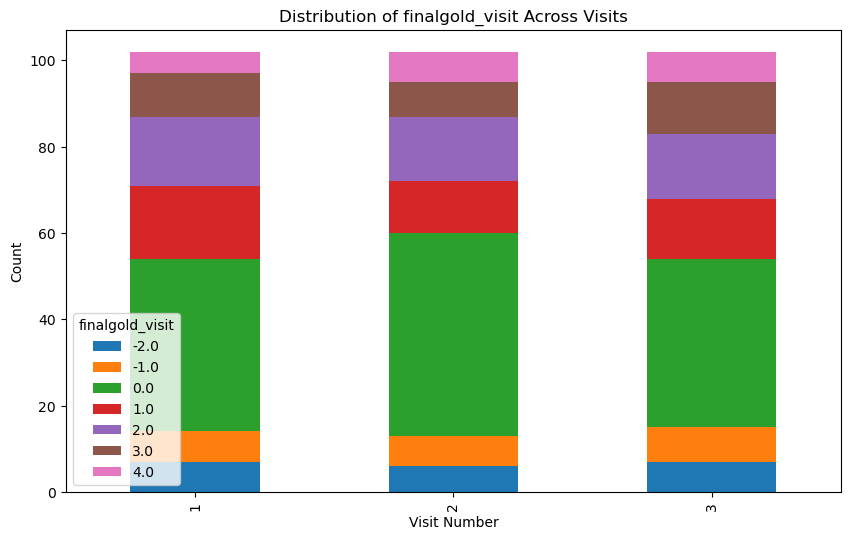

In [50]:
COPDGene_dataset.finalgold_visit.value_counts()
df = COPDGene_dataset

# Group by Visitnum and finalgold_visit and count occurrences
visit_distribution = df.groupby(["Visitnum", "finalgold_visit"]).size().unstack(fill_value=0)

print("Distribution of finalgold_visit across visits:")
print(visit_distribution)

# Visualize the distribution
import matplotlib.pyplot as plt

visit_distribution.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Distribution of finalgold_visit Across Visits")
plt.xlabel("Visit Number")
plt.ylabel("Count")
plt.legend(title="finalgold_visit")
plt.show()


In [4]:
# 1. Combine 'SID' and 'Visitnum' into a MultiIndex for COPDGene_dataset
filter_criteria = pd.MultiIndex.from_tuples(
    [(index, row['Visitnum']) for index, row in COPDGene_dataset.iterrows()],
    names=['SID', 'Visitnum']
)
# 2. Create a MultiIndex for COPDGene_clinical_dataset
COPDGene_clinical_dataset_index = pd.MultiIndex.from_tuples(
    [(index, row['visitnum']) for index, row in COPDGene_clinical_dataset.iterrows()],
    names=['sid', 'visitnum']
)
COPDGene_clinical_dataset = COPDGene_clinical_dataset[COPDGene_clinical_dataset_index.isin(filter_criteria)]
COPDGene_clinical_dataset

,cohort,ccenter,Phase_study,visitnum,shortterm_flag,Visit_Year,phase_baseline,days_since_baseline,years_from_baseline,years_since_last_visit,...,SVI2018_RPL_THEME2,SVI2018_RPL_THEME3,SVI2018_RPL_THEME4,SVI2018_RPL_THEMES,ADI2018_ADI_SUPPRESSION_CODE,ADI2018_ADI_NATRANK,ADI2018_ADI_STATERNK,end_of_record,Unnamed: 1044,Unnamed: 1045
sid,,,,,,,,,,,,,,,,,,,,,
10062C,Smoker,NJC,1,1,0,2008,1,0,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
10062C,Smoker,NJC,2,2,0,2013,1,1969,5.390828,5.33,...,0.1067,0.5421,0.3380,0.1463,NaN,11.0,2.0,1.0,NaN,NaN
10062C,Smoker,NJC,3,3,0,2018,1,3701,10.130000,4.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
10077P,Smoker,NJC,1,1,0,2008,1,0,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
10077P,Smoker,NJC,2,2,0,2013,1,1988,5.442847,5.50,...,0.5500,0.2513,0.2076,0.1212,NaN,14.0,2.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449L,Smoker,UIA,2,2,0,2015,1,1903,5.210130,5.17,...,0.3247,0.1044,0.4013,0.1619,NaN,67.0,6.0,1.0,NaN,NaN
21449L,Smoker,UIA,3,3,0,2019,1,3493,9.560000,4.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
22660M,Smoker,NJC,1,1,0,2010,1,0,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [5]:
# Adjusting for Age and Sex using Regression Residuals
import pandas as pd
import statsmodels.api as sm

COPDGene_dataset['age_visit'] = COPDGene_clinical_dataset['age_visit']
COPDGene_dataset['gender'] = COPDGene_clinical_dataset['gender']
# Adjust each Protein for Age
COPDGene_dataset_adjusted = COPDGene_dataset.copy()
protein_columns = [col for col in COPDGene_dataset_adjusted.columns if col.startswith('X')]

for protein in protein_columns:
    # Regression Model: Protein ~ Age
    X = sm.add_constant(COPDGene_dataset[['age_visit', 'gender']])  # Add intercept
    y = COPDGene_dataset[protein]
    model = sm.OLS(y, X).fit()

    # Residuals are the Age-Adjusted Values
    COPDGene_dataset_adjusted[protein] = model.resid

COPDGene_dataset = COPDGene_dataset_adjusted
COPDGene_dataset

,X10339_48,X11105_171,X11510_31,X13090_17,X14116_129,X2201_17,X2418_55,X2579_17,X2602_2,X2609_59,...,X5456_59,X5465_32,X5483_1,X5843_60,X6641_60,X7655_11,Visitnum,finalgold_visit,age_visit,gender
SID,,,,,,,,,,,,,,,,,,,,,
10062C,547.246897,35301.784802,13350.834640,1951.374172,421.186853,22275.557254,16378.504307,-15340.834535,-3293.574788,-209.629468,...,-545.646867,-76.489825,1800.302858,-155.348798,640.039240,-1884.858797,1,3.0,64.6,1
10062C,-3975.397085,-2321.313897,10391.916802,271.869899,690.906843,34779.868198,1958.947437,-602.917057,-4716.836588,-216.724194,...,-1649.495568,9.115048,1029.319740,-347.286785,974.555279,7354.341627,2,4.0,70.0,1
10062C,3584.530486,3039.087259,-8592.610165,-998.100567,47.335723,-35144.333186,-21292.692003,-13812.268187,12658.641811,89.913827,...,-1223.749968,-946.225065,-6451.498588,513.390559,-782.574907,4955.519783,3,4.0,74.8,1
10077P,215.593346,-4110.352873,18279.836134,798.048011,665.990042,19010.474956,-1034.071823,-15138.135240,-2974.529668,-240.506791,...,1815.875023,791.498353,1285.033499,-164.322045,992.061324,497.074463,1,3.0,62.4,2
10077P,-5203.250637,-9482.751572,5809.518296,-298.756262,37.610032,21665.785900,22406.071307,-447.717761,-4407.491469,-414.801517,...,196.826322,597.903225,881.050380,-217.660033,47.177364,3158.774887,2,3.0,67.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449L,-4117.586414,-8043.001500,3338.972861,-1157.623166,258.855587,26044.342063,-581.737408,-3309.983457,-4434.661569,-148.167891,...,-738.670828,289.325718,1205.667985,-399.417699,-573.199523,11964.486022,2,1.0,68.1,2
21449L,5615.455527,-1966.233773,-12386.093526,-1061.837759,-61.876273,-35722.667538,-29688.731894,-13434.013659,7927.510298,-89.574705,...,785.370972,-943.611052,-7037.240482,602.936534,-1097.760527,25469.549331,3,0.0,72.5,2
22660M,-3237.423066,32802.449584,10801.991329,1818.273273,551.238912,20501.184516,38187.031867,-962.168891,-5729.013069,-16.863496,...,471.071922,843.763112,3983.832053,-396.482688,683.447177,-4190.146958,1,0.0,72.6,2


In [74]:
COPDGene_clinical_dataset_P2 = COPDGene_clinical_dataset[COPDGene_clinical_dataset['visitnum'] == 2]
COPDGene_clinical_dataset_P2 = COPDGene_clinical_dataset_P2[COPDGene_clinical_dataset_P2.index.isin(COPDGene_P2_dataset.index)]
# Dropping Rows where 'finalgold_visit' is NaN
COPDGene_clinical_dataset_P2 = COPDGene_clinical_dataset_P2.dropna(subset=['finalgold_visit'])
# Replacing -1 with 5, and -2 with 6 -> for SmCCNet to work
# COPDGene_clinical_dataset_P2.replace(-1, 5.0, inplace=True)
# COPDGene_clinical_dataset_P2.replace(-2, 6.0, inplace=True)
COPDGene_clinical_dataset_P2

,cohort,ccenter,Phase_study,visitnum,shortterm_flag,Visit_Year,phase_baseline,days_since_baseline,years_from_baseline,years_since_last_visit,...,SVI2018_RPL_THEME2,SVI2018_RPL_THEME3,SVI2018_RPL_THEME4,SVI2018_RPL_THEMES,ADI2018_ADI_SUPPRESSION_CODE,ADI2018_ADI_NATRANK,ADI2018_ADI_STATERNK,end_of_record,Unnamed: 1044,Unnamed: 1045
sid,,,,,,,,,,,,,,,,,,,,,
10010J,Smoker,NJC,2,2,0,2015,1,2757,7.548255,7.58,...,0.5959,0.9497,0.3084,0.7885,NaN,57.0,9.0,1.0,NaN,NaN
10032T,Smoker,NJC,2,2,0,2013,1,1975,5.407255,5.33,...,0.0534,0.0786,0.6728,0.1136,NaN,5.0,1.0,1.0,NaN,NaN
10052Z,Smoker,NJC,2,2,0,2015,1,2804,7.676934,7.75,...,0.0878,0.5319,0.0719,0.0721,NaN,26.0,5.0,1.0,NaN,NaN
10056H,Smoker,NJC,2,2,0,2013,1,1985,5.434634,5.50,...,0.5551,0.6536,0.8087,0.6683,NaN,24.0,4.0,1.0,NaN,NaN
10057J,Smoker,NJC,2,2,0,2013,1,1961,5.368925,5.33,...,0.7816,0.7869,0.1766,0.4846,NaN,26.0,5.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30610T,Never smoked,UIA,2,2,0,2017,2,0,0.000000,NaN,...,0.5613,0.4494,0.9291,0.6522,NaN,37.0,1.0,1.0,NaN,NaN
30611V,Never smoked,UIA,2,2,0,2017,2,0,0.000000,NaN,...,0.8419,0.1354,0.1057,0.1798,NaN,41.0,2.0,1.0,NaN,NaN
30614B,Never smoked,UIA,2,2,0,2017,2,0,0.000000,NaN,...,0.1910,0.1807,0.4308,0.0934,NaN,23.0,1.0,1.0,NaN,NaN


In [75]:
COPDGene_P2_dataset

,X10336_3_3,X10337_83_3,X10339_48_3,X10342_55_3,X10344_334_3,X10346_5_3,X10351_51_3,X10356_21_3,X10358_33_3,X10361_25_3,...,X9201_13_3,X9202_309_3,X9204_33_3,X9207_60_3,X9211_19_3,X9212_22_3,X9213_24_3,X9215_117_3,X9216_100_3,Visitnum
SID,,,,,,,,,,,,,,,,,,,,,
10010J,830.6,759.0,799.9,613.2,1178.5,570.8,1121.1,54089.0,1070.0,424.3,...,2865.2,2220.5,304.6,1134.3,44481.6,1652.9,10094.7,709.2,4660.2,2
10032T,619.5,894.8,2395.8,657.8,2289.4,369.1,899.6,36357.8,852.3,310.1,...,3133.7,3437.4,620.5,4655.7,67700.8,3429.3,24164.9,1008.5,5323.0,2
10052Z,602.0,1008.2,907.3,666.3,1420.0,2462.6,1402.2,50773.5,878.5,352.2,...,4332.9,1595.9,439.1,1769.1,47571.0,2265.8,2940.0,1415.0,5110.8,2
10056H,804.3,906.0,1951.9,554.0,1756.7,369.5,1416.0,43681.5,1092.4,1161.7,...,2488.1,1419.4,527.5,1559.1,62544.9,1722.7,11408.4,1099.8,5181.6,2
10057J,620.4,809.1,1357.1,591.0,1494.7,429.5,1151.6,45351.9,816.6,321.5,...,2366.8,1251.1,437.6,1690.3,46127.8,1913.1,2421.9,799.8,6039.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30610T,917.7,1430.5,4782.2,877.9,2228.0,1009.9,1891.4,73307.6,17681.7,305.7,...,3324.2,1025.2,609.0,2913.5,69860.2,3178.2,18670.3,1151.3,8355.0,2
30611V,855.6,1248.6,4564.4,962.5,1884.9,980.6,2040.7,77777.4,1371.5,324.0,...,3465.2,2363.3,1151.0,2687.9,59297.1,4395.2,16661.5,1376.0,7483.0,2
30614B,1031.8,2230.7,7253.8,1031.9,2305.2,1145.0,12474.6,124218.7,1869.0,2061.6,...,4286.2,1452.4,813.0,3172.5,74404.4,3322.1,9063.3,3560.1,7566.6,2


In [78]:
# Adjusting for Age and Sex using Regression Residuals
import pandas as pd
import statsmodels.api as sm
COPDGene_P2_dataset['finalgold_visit'] = COPDGene_clinical_dataset_P2['finalgold_visit']
COPDGene_P2_dataset['age_visit'] = COPDGene_clinical_dataset_P2['age_visit']
COPDGene_P2_dataset['gender'] = COPDGene_clinical_dataset_P2['gender']
# Adjust each Protein for Age
COPDGene_P2_dataset_adjusted = COPDGene_P2_dataset.copy()
protein_columns = [col for col in COPDGene_P2_dataset_adjusted.columns if col.startswith('X')]

for protein in protein_columns:
    # Regression Model: Protein ~ Age
    X = sm.add_constant(COPDGene_P2_dataset[['age_visit', 'gender']])  # Add intercept
    y = COPDGene_P2_dataset[protein]
    model = sm.OLS(y, X).fit()

    # Residuals are the Age-Adjusted Values
    COPDGene_P2_dataset_adjusted[protein] = model.resid

COPDGene_P2_dataset = COPDGene_P2_dataset_adjusted
COPDGene_P2_dataset

/tmp/ipykernel_2510435/376350586.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  COPDGene_P2_dataset['finalgold_visit'] = COPDGene_clinical_dataset_P2['finalgold_visit']


,X10336_3_3,X10337_83_3,X10339_48_3,X10342_55_3,X10344_334_3,X10346_5_3,X10351_51_3,X10356_21_3,X10358_33_3,X10361_25_3,...,X9207_60_3,X9211_19_3,X9212_22_3,X9213_24_3,X9215_117_3,X9216_100_3,Visitnum,age_visit,gender,finalgold_visit
SID,,,,,,,,,,,,,,,,,,,,,
10010J,223.879881,-235.440399,-2451.951667,-161.635218,-671.677966,-13.364403,-748.051359,4410.064592,-497.646657,-127.428198,...,-1237.945691,-8007.205873,-1542.829066,-9.441156,-610.064161,-437.362909,2,73.5,2,2.0
10032T,-5.706239,-85.496225,-713.896219,-101.068725,409.934458,-219.248440,-962.080542,-13316.401617,-668.438358,-246.018508,...,2166.029082,16089.819415,274.540780,13221.317041,-238.064982,305.612834,2,66.3,2,2.0
10052Z,-57.421049,7.342010,-1808.625536,-16.375710,-345.736010,1884.126143,-78.518575,817.198967,-458.192314,-257.994814,...,-944.441518,-5615.917191,-653.230233,-11496.371231,348.140993,16.943419,2,55.1,1,4.0
10056H,147.770058,-50.329709,-916.921710,-177.814388,-172.391711,-225.938059,-433.021659,-5984.680472,-348.854851,598.142354,...,-1129.541441,12421.345596,-1362.638094,-957.570459,-23.580263,300.066174,2,54.1,2,4.0
10057J,-20.791681,-205.705717,-1499.006603,-107.420447,-242.155207,-144.847932,-336.485630,-4609.069077,-566.349109,-284.365479,...,-907.447197,-7924.750460,-1046.331052,-11186.688342,-338.748475,866.481228,2,62.2,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30610T,311.426546,388.977510,1657.577551,149.320621,546.465770,443.455250,389.202828,23337.689319,16210.146326,-291.872670,...,537.556009,14149.535108,141.381462,6647.323952,-124.569145,3030.638160,2,75.8,1,-2.0
30611V,259.853364,199.023189,1358.827921,224.828590,220.043417,416.537827,534.248613,27804.793688,-126.765344,-271.072632,...,378.823153,3086.562375,1335.051411,5116.539423,58.732712,2112.982529,2,79.9,1,-2.0
30614B,375.203219,1227.681094,4516.156270,346.784964,543.938480,567.165371,10992.740050,74261.675749,525.141140,1452.075928,...,476.898447,21083.370613,396.810485,-5244.823178,2482.134174,2460.494347,2,56.2,1,-2.0


In [6]:
# Using ComBat to Correct for Batch Effect
from combat.pycombat import pycombat
# Add Batch Information as a Categorical Column
COPDGene_dataset['Batch'] = COPDGene_dataset['Visitnum'].apply(lambda x: 'V3' if x in [1, 2] else 'V4')

# Apply ComBat to Correct for Batch Effect
protein_columns = [col for col in COPDGene_dataset.columns if col.startswith('X')]
protein_data_corrected = pycombat(COPDGene_dataset[protein_columns].T, batch=COPDGene_dataset['Batch']).T

# Update the DataFrame
COPDGene_dataset[protein_columns] = protein_data_corrected
COPDGene_dataset

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


,X10339_48,X11105_171,X11510_31,X13090_17,X14116_129,X2201_17,X2418_55,X2579_17,X2602_2,X2609_59,...,X5465_32,X5483_1,X5843_60,X6641_60,X7655_11,Visitnum,finalgold_visit,age_visit,gender,Batch
SID,,,,,,,,,,,,,,,,,,,,,
10062C,3092.930061,43591.008676,4925.050907,1503.192094,225.149646,2119.621842,2372.650274,-14740.524032,355.919009,-138.969861,...,-285.438154,-499.218167,121.838589,160.545661,-2235.616714,1,3.0,64.6,1,V3
10062C,-2595.328228,-684.570322,3111.525474,95.705494,434.160197,8584.753118,-6768.353492,-2824.655938,-995.511812,-146.152158,...,-235.173709,-954.627710,-140.609243,397.853000,5622.944611,2,4.0,70.0,1,V3
10062C,-173.266904,-289.901516,744.691990,-480.758004,183.136656,221.301294,1748.022489,-4837.822463,2755.581705,-43.481598,...,-50.152607,-452.210018,18.481077,32.408490,4195.284562,3,4.0,74.8,1,V4
10077P,2675.799933,-2789.945457,7946.043737,536.662182,414.851749,431.469189,-8665.721113,-14576.638051,658.862156,-170.228307,...,224.216764,-803.580971,109.568953,410.271875,-209.622285,1,3.0,62.4,2,V3
10077P,-4139.634649,-9112.286551,302.966165,-382.500300,-72.090477,1804.350422,6193.711708,-2699.174550,-701.779113,-346.674380,...,110.543892,-1042.208463,36.636859,-260.033495,2054.332934,2,3.0,67.8,2,V3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449L,-2774.163801,-7417.961249,-1211.235048,-1102.262481,99.356420,4068.204907,-8378.972316,-5013.367212,-727.577958,-76.749654,...,-70.642958,-850.461132,-211.890834,-700.131937,9544.182464,2,1.0,68.1,2,V3
21449L,1360.576729,-3680.971545,-704.295540,-525.747392,118.478991,39.321112,-1960.073546,-4609.663604,334.262433,-185.278000,...,-49.158689,-673.469599,78.836097,-165.314567,17546.122413,3,0.0,72.5,2,V4
22660M,-1667.157262,40649.743399,3362.860802,1391.648626,325.929171,1202.214018,16197.751444,-3115.117428,-1956.604488,56.175451,...,254.904961,790.563682,-207.877626,191.339468,-4196.419332,1,0.0,72.6,2,V3


In [7]:
# Standardization
COPDGene_dataset_columns = COPDGene_dataset.loc[:, ~COPDGene_dataset.columns.isin(['finalgold_visit', 'Visitnum', 'Batch', 'age_visit', 'gender'])].columns
scaler = StandardScaler()
COPDGene_dataset[COPDGene_dataset_columns] = scaler.fit_transform(COPDGene_dataset[COPDGene_dataset_columns])
COPDGene_dataset

,X10339_48,X11105_171,X11510_31,X13090_17,X14116_129,X2201_17,X2418_55,X2579_17,X2602_2,X2609_59,...,X5465_32,X5483_1,X5843_60,X6641_60,X7655_11,Visitnum,finalgold_visit,age_visit,gender,Batch
SID,,,,,,,,,,,,,,,,,,,,,
10062C,0.767561,3.782316,1.284222,1.283374,0.662710,0.249348,0.192533,-1.611429,0.162530,-0.314620,...,-1.018870,-0.280407,0.358393,0.174648,-0.561425,1,3.0,64.6,1,V3
10062C,-0.643241,-0.059286,0.810061,0.081195,1.279150,1.028165,-0.562760,-0.309606,-0.450725,-0.330900,...,-0.840212,-0.532422,-0.413673,0.435956,1.409901,2,4.0,70.0,1,V3
10062C,-0.042521,-0.025042,0.191232,-0.411181,0.538800,0.020669,0.140922,-0.529547,1.251455,-0.098179,...,-0.182581,-0.254394,0.054337,0.033551,1.051771,3,4.0,74.8,1,V4
10077P,0.664105,-0.241960,2.074086,0.457830,1.222203,0.045986,-0.719534,-1.593525,0.300000,-0.385472,...,0.792627,-0.448836,0.322298,0.449630,-0.053203,1,3.0,62.4,2,V3
10077P,-1.026259,-0.790522,0.075739,-0.327255,-0.213948,0.211369,0.508256,-0.295897,-0.317435,-0.785417,...,0.388593,-0.580887,0.107747,-0.288468,0.514712,2,3.0,67.8,2,V3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449L,-0.687595,-0.643513,-0.320161,-0.942027,0.291704,0.484083,-0.695841,-0.548726,-0.329142,-0.173587,...,-0.255411,-0.474778,-0.623369,-0.773076,2.393546,2,1.0,68.1,2,V3
21449L,0.337903,-0.319270,-0.187618,-0.449607,0.348103,-0.001253,-0.165467,-0.504621,0.152703,-0.419585,...,-0.179048,-0.376835,0.231889,-0.184169,4.400839,3,0.0,72.5,2,V4
22660M,-0.413036,3.527115,0.875774,1.188101,0.959941,0.138833,1.334859,-0.341340,-0.886852,0.127710,...,0.901704,0.433331,-0.611563,0.208556,-1.053294,1,0.0,72.6,2,V3


In [8]:

import pandas as pd
from scipy import stats

from sklearn.manifold import LocallyLinearEmbedding
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

def remove_outliers(scores, threshold=1.5):
    z_scores = np.abs(stats.zscore(scores))
    return scores[z_scores < threshold]

def compute_neighborhood_preservation_outliers(X, X_transformed, n_neighbors=10):
    # Fit NearestNeighbors on the Original and Embedding Space
    # TODO: Check other Distances (Manhattan, Euclidean, ..etc)
    nbrs_original = NearestNeighbors(n_neighbors=n_neighbors+1).fit(X)
    nbrs_transformed = NearestNeighbors(n_neighbors=n_neighbors+1).fit(X_transformed)

    # Get the Indicies of the K-Nearest Neighbors
    original_neighbors = nbrs_original.kneighbors(X, return_distance=False)[:, 1:]
    transformed_neighbors = nbrs_transformed.kneighbors(X_transformed, return_distance=False)[:, 1:]

    # Calculate the Neighborhood Preservation Score
    preservation_scores = []
    for i in range(X.shape[0]):
        shared_neighbors = len(set(original_neighbors[i]).intersection(set(transformed_neighbors[i])))
        preservation_score = shared_neighbors / n_neighbors
        preservation_scores.append(preservation_score)

    preservation_scores = np.array(preservation_scores)
    filtered_preservation_scores = remove_outliers(preservation_scores)

    return np.mean(filtered_preservation_scores)

def compute_neighborhood_preservation(X, X_transformed, n_neighbors=10):
    # Fit NearestNeighbors on the Original and Embedding Space
    nbrs_original = NearestNeighbors(n_neighbors=n_neighbors+1).fit(X)
    nbrs_transformed = NearestNeighbors(n_neighbors=n_neighbors+1).fit(X_transformed)

    # Get the Indicies of the K-Nearest Neighbors
    original_neighbors = nbrs_original.kneighbors(X, return_distance=False)[:, 1:]
    transformed_neighbors = nbrs_transformed.kneighbors(X_transformed, return_distance=False)[:, 1:]

    # Calculate the Neighborhood Preservation Score
    preservation_scores = []
    for i in range(X.shape[0]):
        shared_neighbors = len(set(original_neighbors[i]).intersection(set(transformed_neighbors[i])))
        preservation_score = shared_neighbors / n_neighbors
        preservation_scores.append(preservation_score)
    mean_score = np.mean(preservation_scores)
    return mean_score

def compute_distance_preservation(X, X_transformed, metric='euclidean'):
    original_distances = pairwise_distances(X, metric=metric).flatten()
    transformed_distances = pairwise_distances(X_transformed, metric=metric).flatten()

    corr_coef = np.corrcoef(original_distances, transformed_distances)[0, 1]
    return corr_coef

Reconstruction Error: 0.005060243316646359
Neighborhood Preservation Score: 0.1095336787564767
Pairwise Distance Preservation Score: 0.772091170021039


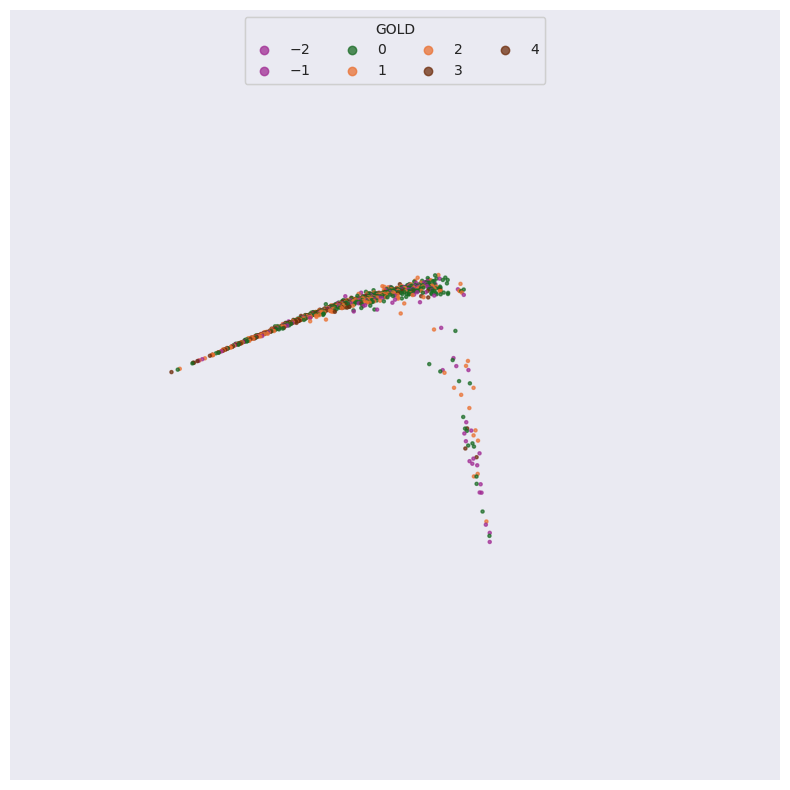

In [100]:
# A Simple Feature Selection Approach Prior to Running Manifold Learning LLE (Selecting the Top K-Related Features)
# Generating a Manifold Based on 1 Visit
# COPDGene_dataset_V2 = COPDGene_dataset[COPDGene_dataset['Visitnum'] == 2]
COPDGene_dataset_V2 = COPDGene_P2_dataset

X = COPDGene_dataset_V2.loc[:, COPDGene_dataset_V2.columns.str.startswith('X')]
# Select all Columns Except 'Visitnum' and 'finalgold_visit'
Y = COPDGene_dataset_V2['finalgold_visit']
k = 20
corr = X[X.columns].corrwith(Y).abs().sort_values(ascending=False)
trimmed = X[corr[:k].index.tolist()]
features = trimmed.columns

# Standardize the dataset
scaler = StandardScaler()
trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

lle = LocallyLinearEmbedding(n_neighbors=15, n_components=3, reg=0.01, max_iter=1000, random_state=42)
embedding = lle.fit_transform(trimmed)

# Evaluating the Quality of the Generated Manifold
reconstruction_error = lle.reconstruction_error_ 
neighborhood_preservation_score = compute_neighborhood_preservation(trimmed, embedding)
pairwise_distances_preservation_score_euclidean = compute_distance_preservation(trimmed, embedding)
pairwise_distances_preservation_score_manhattan = compute_distance_preservation(trimmed, embedding, 'manhattan')

print("Reconstruction Error: %s\nNeighborhood Preservation Score: %s\nPairwise Distance Preservation Score: %s" % 
      (reconstruction_error,
       neighborhood_preservation_score,
       pairwise_distances_preservation_score_euclidean))
# Create a 3D scatter plot of the LLE embedding
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
custom_cmap = ListedColormap(['#A02B93', '#196B24', '#E97132', '#6E2D0C'])  # Red, Green, Blue, Yellow
sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=Y, s=5, alpha=0.7, cmap=custom_cmap)

legend1 = ax.legend(*sc.legend_elements(), loc="upper center", title="GOLD", ncol=4)
ax.add_artist(legend1)
ax.grid(False)
ax.set_axis_off()
fig.patch.set_alpha(0.0)

plt.show()

In [39]:
COPDGene_dataset_V1 = COPDGene_dataset[COPDGene_dataset['Visitnum'] == 1]
COPDGene_dataset_V3 = COPDGene_dataset[COPDGene_dataset['Visitnum'] == 3]

X = COPDGene_dataset_V1.loc[:, COPDGene_dataset_V1.columns.str.startswith('X')]
# Select all Columns Except 'Visitnum' and 'finalgold_visit'
Y = COPDGene_dataset_V1['finalgold_visit']
trimmed = X[features]

# Standardize the dataset
scaler = StandardScaler()
trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

manifold_visit2 = lle.transform(trimmed)

X = COPDGene_dataset_V3.loc[:, COPDGene_dataset_V3.columns.str.startswith('X')]
# Select all Columns Except 'Visitnum' and 'finalgold_visit'
Y = COPDGene_dataset_V3['finalgold_visit']
trimmed = X[features]

# Standardize the dataset
scaler = StandardScaler()
trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

manifold_visit3 = lle.transform(trimmed)

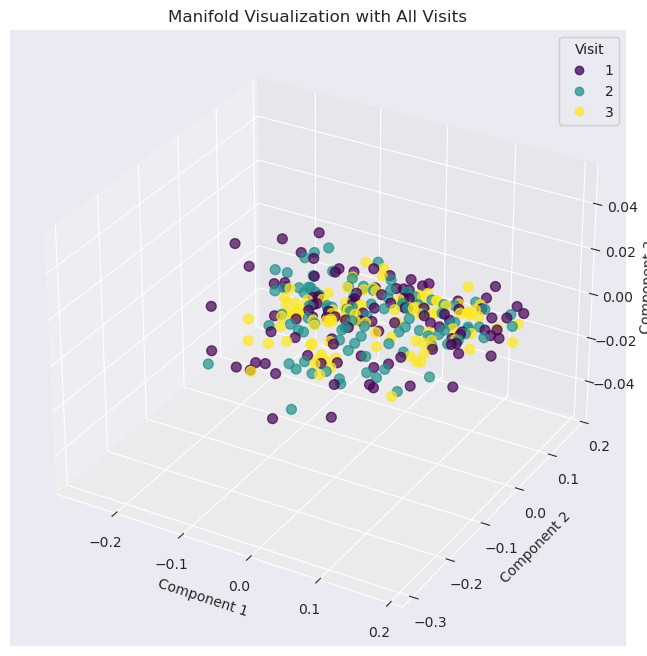

In [40]:
import matplotlib.pyplot as plt

# Combine the manifold projections
# `manifold_visit1`, `manifold_visit2`, and `manifold_visit3` are the 3D projections from the LLE
manifold_all = np.vstack([embedding, manifold_visit2, manifold_visit3])
labels = np.array([1] * len(embedding) + [2] * len(manifold_visit2) + [3] * len(manifold_visit3))  # Visit labels

# Create a scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot, coloring points by visit
scatter = ax.scatter(
    manifold_all[:, 0],
    manifold_all[:, 1],
    # manifold_all[:, 2],
    c=labels,
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Add legend and labels
legend = ax.legend(*scatter.legend_elements(), title="Visit")
ax.add_artist(legend)
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.set_title("Manifold Visualization with All Visits")

plt.show()


Reconstruction Error: 0.02703919209537865
Neighborhood Preservation Score: 0.27058823529411763
Pairwise Distance Preservation Score: 0.6494299802695218


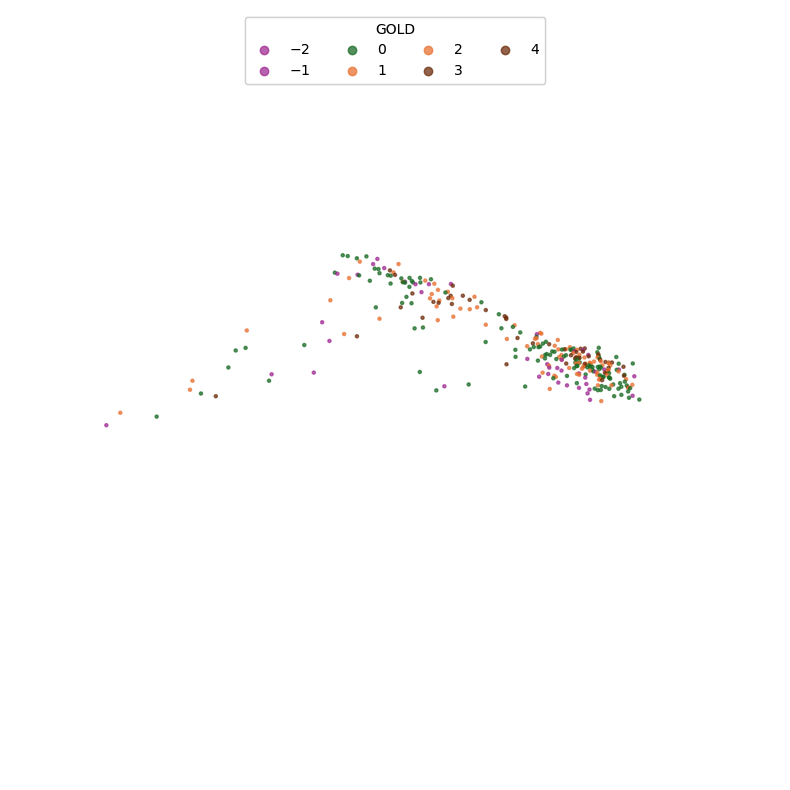

In [77]:
# A Simple Feature Selection Approach Prior to Running Manifold Learning LLE (Selecting the Top K-Related Features)
X = COPDGene_dataset_adjusted_for_age.loc[:, ~COPDGene_dataset_adjusted_for_age.columns.isin(['finalgold_visit', 'Visitnum', 'age_visit'])]
# Select all Columns Except 'Visitnum' and 'finalgold_visit'
Y = COPDGene_dataset_adjusted_for_age['finalgold_visit']
k = 30
corr = X[X.columns].corrwith(Y).abs().sort_values(ascending=False)
trimmed = X[corr[:k].index.tolist()]

# Standardize the dataset
scaler = StandardScaler()
trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

lle = LocallyLinearEmbedding(n_neighbors=50, n_components=3, reg=0.01, max_iter=1000, random_state=42)
embedding = lle.fit_transform(trimmed)

# Evaluating the Quality of the Generated Manifold
reconstruction_error = lle.reconstruction_error_
neighborhood_preservation_score = compute_neighborhood_preservation(trimmed, embedding)
pairwise_distances_preservation_score_euclidean = compute_distance_preservation(trimmed, embedding)
pairwise_distances_preservation_score_manhattan = compute_distance_preservation(trimmed, embedding, 'manhattan')

print("Reconstruction Error: %s\nNeighborhood Preservation Score: %s\nPairwise Distance Preservation Score: %s" %
      (reconstruction_error,
       neighborhood_preservation_score,
       pairwise_distances_preservation_score_euclidean))
# Create a 3D scatter plot of the LLE embedding
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
custom_cmap = ListedColormap(['#A02B93', '#196B24', '#E97132', '#6E2D0C'])  # Red, Green, Blue, Yellow
sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=Y, s=5, alpha=0.7, cmap=custom_cmap)

legend1 = ax.legend(*sc.legend_elements(), loc="upper center", title="GOLD", ncol=4)
ax.add_artist(legend1)
ax.grid(False)
ax.set_axis_off()
fig.patch.set_alpha(0.0)

plt.show()

Reconstruction Error: 0.02430206840451464
Neighborhood Preservation Score: 0.27385620915032677
Pairwise Distance Preservation Score: 0.6177480852917571


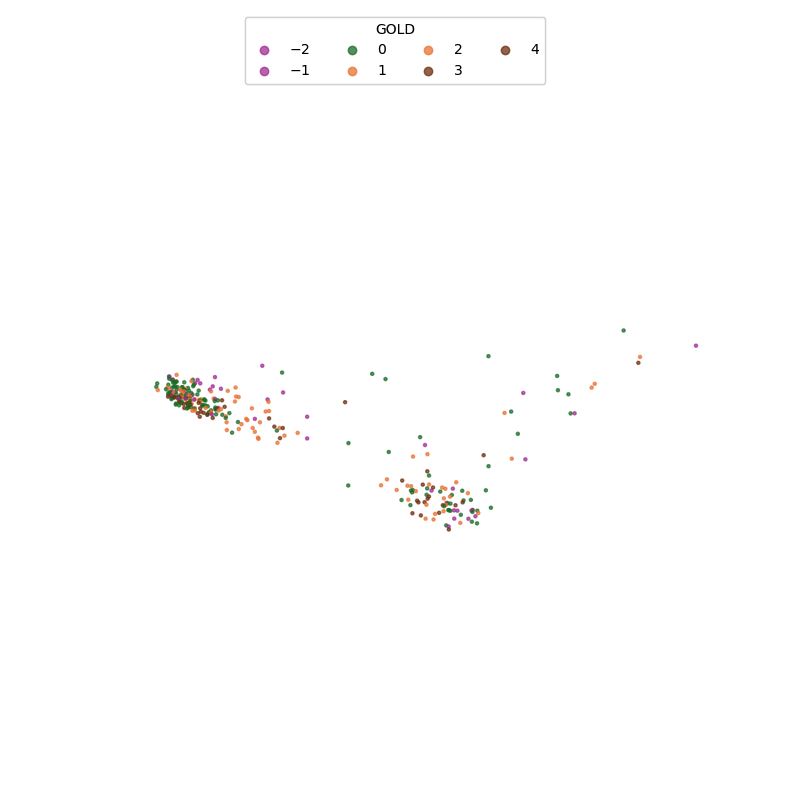

In [72]:
# A Simple Feature Selection Approach Prior to Running Manifold Learning LLE (Selecting the Top K-Related Features)
X = COPDGene_dataset
X['age_visit'] = COPDGene_clinical_dataset['age_visit']
X = X.loc[:, ~X.columns.isin(['finalgold_visit', 'Visitnum'])]
# Select all Columns Except 'Visitnum' and 'finalgold_visit'
Y = COPDGene_dataset['finalgold_visit']
k = 30
corr = X[X.columns].corrwith(Y).abs().sort_values(ascending=False)
trimmed = X[corr[:k].index.tolist()]

# Standardize the dataset
scaler = StandardScaler()
trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

lle = LocallyLinearEmbedding(n_neighbors=50, n_components=3, reg=0.01, max_iter=1000, random_state=42)
embedding = lle.fit_transform(trimmed)

# Evaluating the Quality of the Generated Manifold
reconstruction_error = lle.reconstruction_error_
neighborhood_preservation_score = compute_neighborhood_preservation(trimmed, embedding)
pairwise_distances_preservation_score_euclidean = compute_distance_preservation(trimmed, embedding)
pairwise_distances_preservation_score_manhattan = compute_distance_preservation(trimmed, embedding, 'manhattan')

print("Reconstruction Error: %s\nNeighborhood Preservation Score: %s\nPairwise Distance Preservation Score: %s" %
      (reconstruction_error,
       neighborhood_preservation_score,
       pairwise_distances_preservation_score_euclidean))
# Create a 3D scatter plot of the LLE embedding
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
custom_cmap = ListedColormap(['#A02B93', '#196B24', '#E97132', '#6E2D0C'])  # Red, Green, Blue, Yellow
sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=Y, s=5, alpha=0.7, cmap=custom_cmap)

legend1 = ax.legend(*sc.legend_elements(), loc="upper center", title="GOLD", ncol=4)
ax.add_artist(legend1)
ax.grid(False)
ax.set_axis_off()
fig.patch.set_alpha(0.0)

plt.show()

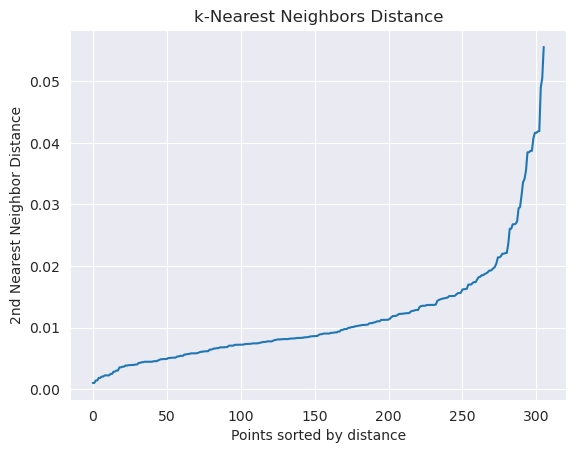

eps=0.01, min_samples=3, Silhouette Score=-0.27
eps=0.01, min_samples=5, Silhouette Score=-0.32
eps=0.02, min_samples=3, Silhouette Score=-0.02
eps=0.02, min_samples=5, Silhouette Score=0.37
eps=0.02, min_samples=10, Silhouette Score=0.29
eps=0.03, min_samples=3, Silhouette Score=0.26
eps=0.03, min_samples=5, Silhouette Score=0.46
eps=0.03, min_samples=10, Silhouette Score=0.44
eps=0.04, min_samples=3, Silhouette Score=0.37
eps=0.04, min_samples=5, Silhouette Score=0.47
eps=0.04, min_samples=10, Silhouette Score=0.47
eps=0.05, min_samples=3, Silhouette Score=0.48
eps=0.05, min_samples=5, Silhouette Score=0.48
eps=0.05, min_samples=10, Silhouette Score=0.48
eps=0.06, min_samples=3, Silhouette Score=0.25
eps=0.07, min_samples=10, Silhouette Score=0.50
Best Parameters: eps=0.07, min_samples=10
Best Silhouette Score: 0.50


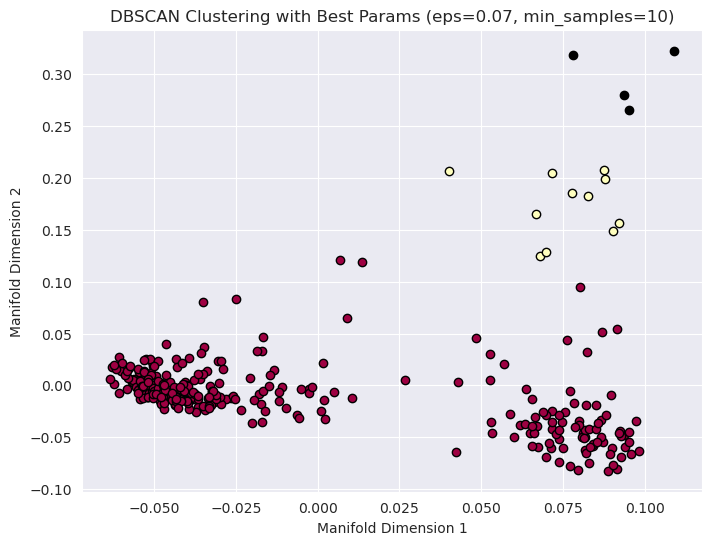

In [190]:
############## Hyperparameters Tuning for DBSCAN ############## 
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

manifold = embedding

# Step 1: Analyze the Distance Distribution
nn = NearestNeighbors(n_neighbors=2)
nn.fit(manifold)
distances, _ = nn.kneighbors(manifold)
distances = np.sort(distances[:, 1])  # Distance to the 2nd nearest neighbor
plt.plot(distances)
plt.title("k-Nearest Neighbors Distance")
plt.xlabel("Points sorted by distance")
plt.ylabel("2nd Nearest Neighbor Distance")
plt.show()

# Step 2: Grid Search for DBSCAN Parameters
eps_values = np.linspace(0.01, 0.1, 10)  # Adjust range based on the distance plot
min_samples_values = [3, 5, 10]
best_silhouette_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        # Run DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(manifold)

        # Calculate metrics only if there are clusters
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            silhouette = silhouette_score(manifold, labels)
            print(f"eps={eps:.2f}, min_samples={min_samples}, Silhouette Score={silhouette:.2f}")

            # Update best parameters
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_params = (eps, min_samples)

# Step 3: Print Best Parameters and Score
print(f"Best Parameters: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best Silhouette Score: {best_silhouette_score:.2f}")

# Step 4: Run DBSCAN with Best Parameters and Visualize Results
dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
labels = dbscan.fit_predict(manifold)

# Visualize Clustering Results
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise

    class_member_mask = (labels == k)
    xy = manifold[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f"DBSCAN Clustering with Best Params (eps={best_params[0]}, min_samples={best_params[1]})")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.show()


Estimated number of clusters: 2
Estimated number of noise points: 73
Silhouette Score: 0.37


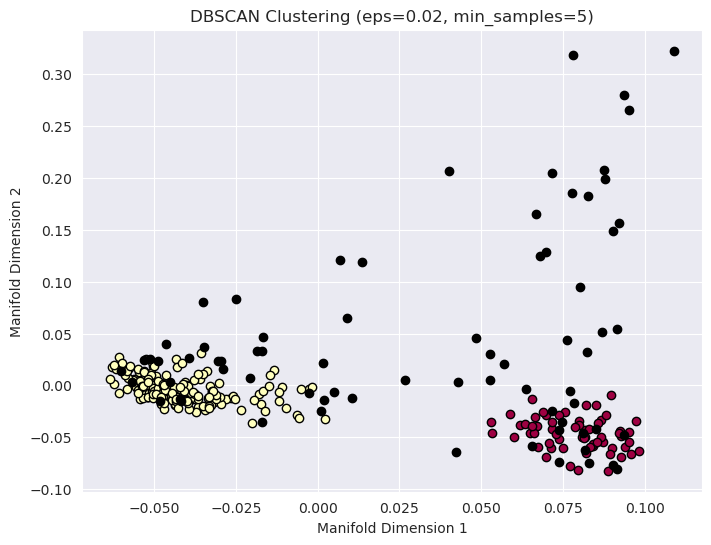

In [192]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

manifold = embedding

# Step 1: Set up DBSCAN parameters
eps = 0.02  # Distance for neighborhood
min_samples = 5  # Minimum points to form a cluster

# Step 2: Run DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(manifold)

# Step 3: Evaluate Clustering (optional, depending on labels)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# If more than one cluster is found, calculate silhouette score
if n_clusters > 1:
    silhouette = silhouette_score(manifold, labels)
    print(f"Silhouette Score: {silhouette:.2f}")

# Step 4: Visualize Clusters (for 2D or 3D manifold)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = manifold[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.show()


min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.0, Silhouette Score=0.42
min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.1, Silhouette Score=0.48
min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.2, Silhouette Score=0.48
min_cluster_size=5, min_samples=3, cluster_selection_epsilon=0.0, Silhouette Score=0.14
min_cluster_size=5, min_samples=3, cluster_selection_epsilon=0.1, Silhouette Score=0.47
min_cluster_size=5, min_samples=3, cluster_selection_epsilon=0.2, Silhouette Score=0.47
min_cluster_size=5, min_samples=5, cluster_selection_epsilon=0.0, Silhouette Score=0.42
min_cluster_size=5, min_samples=5, cluster_selection_epsilon=0.1, Silhouette Score=0.48
min_cluster_size=5, min_samples=5, cluster_selection_epsilon=0.2, Silhouette Score=0.48
min_cluster_size=5, min_samples=10, cluster_selection_epsilon=0.0, Silhouette Score=0.40
min_cluster_size=5, min_samples=10, cluster_selection_epsilon=0.1, Silhouette Score=0.47
min_cluster_size=5, m

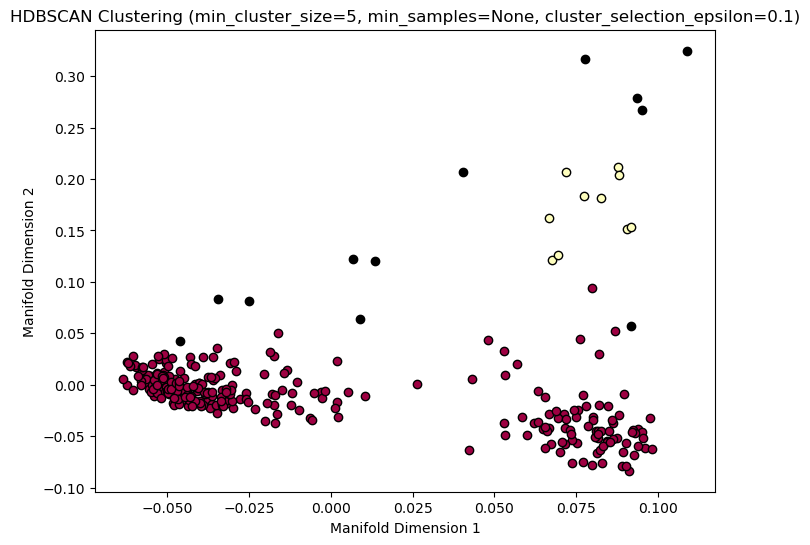

In [9]:
############## Hyperparameters Tuning for HDBSCAN ############## 
import numpy as np
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

manifold = embedding

# Step 1: Define parameter ranges for tuning
min_cluster_size_values = [5, 10, 15, 20]  # Minimum size of clusters
min_samples_values = [None, 3, 5, 10]       # Minimum samples for core points
cluster_selection_epsilon_values = [0.0, 0.1, 0.2]  # Additional flexibility for cluster separation

best_silhouette_score = -1
best_params = None

# Step 2: Perform grid search
for min_cluster_size in min_cluster_size_values:
    for min_samples in min_samples_values:
        for cluster_selection_epsilon in cluster_selection_epsilon_values:
            # Initialize HDBSCAN with the current parameters
            hdbscan = HDBSCAN(
                min_cluster_size=min_cluster_size,
                min_samples=min_samples,
                cluster_selection_epsilon=cluster_selection_epsilon
            )

            # Fit and predict labels
            labels = hdbscan.fit_predict(manifold)

            # Ignore cases where no valid clusters are found
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters > 1:
                # Calculate Silhouette Score
                silhouette = silhouette_score(manifold, labels)
                print(f"min_cluster_size={min_cluster_size}, min_samples={min_samples}, "
                      f"cluster_selection_epsilon={cluster_selection_epsilon}, "
                      f"Silhouette Score={silhouette:.2f}")

                # Update best score and parameters
                if silhouette > best_silhouette_score:
                    best_silhouette_score = silhouette
                    best_params = {
                        'min_cluster_size': min_cluster_size,
                        'min_samples': min_samples,
                        'cluster_selection_epsilon': cluster_selection_epsilon
                    }

# Step 3: Print the best parameters and score
if best_params:
    print("\nBest Parameters:")
    print(f"  min_cluster_size: {best_params['min_cluster_size']}")
    print(f"  min_samples: {best_params['min_samples']}")
    print(f"  cluster_selection_epsilon: {best_params['cluster_selection_epsilon']}")
    print(f"Best Silhouette Score: {best_silhouette_score:.2f}")
else:
    print("No valid clusters were found with the provided parameter ranges.")

# Step 4: Visualize clustering with the best parameters
if best_params:
    hdbscan = HDBSCAN(
        min_cluster_size=best_params['min_cluster_size'],
        min_samples=best_params['min_samples'],
        cluster_selection_epsilon=best_params['cluster_selection_epsilon']
    )
    labels = hdbscan.fit_predict(manifold)

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    plt.figure(figsize=(8, 6))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black for noise
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)
        xy = manifold[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title(f"HDBSCAN Clustering (min_cluster_size={best_params['min_cluster_size']}, "
              f"min_samples={best_params['min_samples']}, "
              f"cluster_selection_epsilon={best_params['cluster_selection_epsilon']})")
    plt.xlabel("Manifold Dimension 1")
    plt.ylabel("Manifold Dimension 2")
    plt.show()


Estimated number of clusters: 3
Estimated number of noise points: 8
Silhouette Score: 0.44


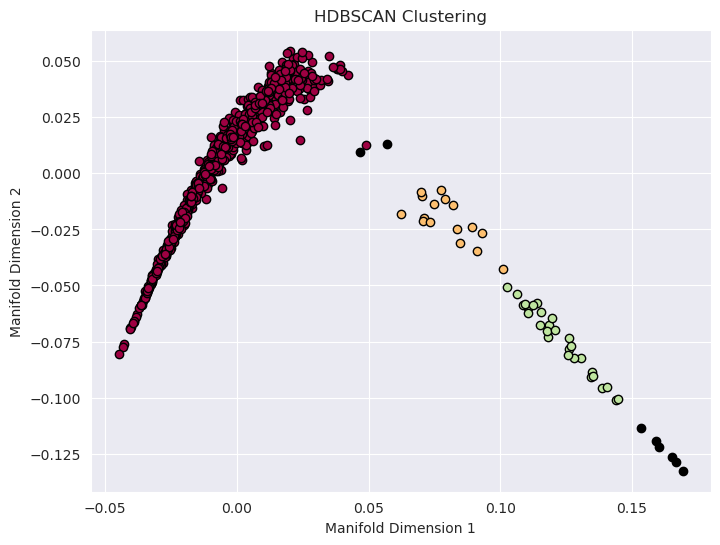

In [101]:
import numpy as np
import pandas as pd
import hdbscan
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Example: Assume `manifold` is a 2D or 3D array-like object (from LLE output)
manifold = embedding
# manifold = manifold_all
# Step 1: Initialize HDBSCAN with parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5, cluster_selection_epsilon=0.005)

# Step 2: Fit HDBSCAN
clusterer.fit(manifold)
labels = clusterer.labels_

# Step 3: Evaluate clustering
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# If more than one cluster is found, calculate silhouette score
if n_clusters > 1:
    silhouette = silhouette_score(manifold, labels)
    print(f"Silhouette Score: {silhouette:.2f}")

# Step 4: Visualize clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = manifold[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title("HDBSCAN Clustering")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.show()


In [74]:
X

,X10339_48,X11105_171,X11510_31,X13090_17,X14116_129,X2201_17,X2418_55,X2579_17,X2602_2,X2609_59,...,X5358_3,X5440_26,X5451_1,X5456_59,X5465_32,X5483_1,X5843_60,X6641_60,X7655_11,age_visit
SID,,,,,,,,,,,,,,,,,,,,,
10062C,6274.1,47049.6,43046.1,5100.6,2520.1,80172.2,56127.4,15290.1,168.6,2100.4,...,4915.8,4351.7,13583.3,5893.0,2174.4,17658.7,536.7,3119.1,2065.0,64.6
10062C,2646.7,9805.4,36470.0,3258.5,2767.4,88272.7,34986.8,27374.2,204.6,2254.7,...,5620.2,5629.0,12577.5,4524.5,2115.6,15949.6,459.2,3194.0,12443.4,70.0
10062C,11002.4,15502.6,14270.2,1844.0,2103.9,14434.0,5760.9,11805.9,18877.2,2704.8,...,7474.2,5194.6,8049.7,4715.0,1031.9,7634.9,1421.6,1206.1,11057.2,74.8
10077P,6419.4,10349.5,53052.6,3769.6,2782.2,77843.0,46411.8,12775.3,121.7,1938.0,...,5994.8,4237.2,18476.6,8700.4,3281.0,17956.3,594.6,3324.0,5723.3,62.4
10077P,1895.8,5356.0,36965.1,2510.2,2131.4,76094.5,63130.9,24811.9,148.0,1925.1,...,10339.6,3813.5,17033.6,6816.7,2943.0,16614.2,655.7,2119.5,9524.2,67.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449L,3031.2,6816.8,34293.6,1642.3,2351.4,80228.4,39769.7,21802.2,201.9,2200.7,...,7336.9,2299.0,19332.0,5866.5,2626.4,16886.7,480.3,1484.7,18393.2,68.1
21449L,13493.7,13202.3,15621.2,1605.6,2012.4,14873.1,5186.3,9515.8,13753.1,2390.8,...,7376.4,2095.7,10075.9,7174.9,1275.8,7879.4,1575.9,748.6,32826.5,72.5
22660M,4657.4,47978.0,38742.3,4482.7,2625.1,71015.4,72937.6,21938.5,123.6,2466.5,...,6265.9,9558.1,16462.5,6855.7,3060.5,18883.1,578.6,2525.0,3187.9,72.6


In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert gender to a NumPy array for element-wise comparison
visit = np.array(COPDGene_clinical_dataset['visitnum'].tolist())

# Initialize a dictionary to store cluster and visit counts
cluster_visit_counts = {}

# Step 4: Visualize clusters with sex and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {1: 'blue', 2: 'red', 3: 'green'}  # Define colors for visit

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_visit_counts[k] = {'Visit1': 0, 'Visit2': 0, 'Visit3': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for visit_i, visit_name in zip([1, 2, 3], ['Visit1', 'Visit2', 'Visit3']):
        visit_mask = (visit == visit_i)  # Perform element-wise comparison
        final_mask = class_member_mask & visit_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count males and females in the cluster
        cluster_visit_counts[k][visit_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[visit_i],
                        edgecolor='k', s=60, label=f"{cluster_name} (Visit {visit_i})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[visit_i],
                        s=60, label=f"{cluster_name} (Gender {visit_i})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Sex Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_visit_counts dictionary
cluster_visit_df = pd.DataFrame(cluster_visit_counts).T.reset_index()
cluster_visit_df.columns = ['Cluster', 'Visit1', 'Visit2', 'Visit3']

# Display the table
print("Visit Counts per Cluster:")
print(cluster_visit_df)

ValueError: operands could not be broadcast together with shapes (965,) (21794,) 

<Figure size 1000x800 with 0 Axes>

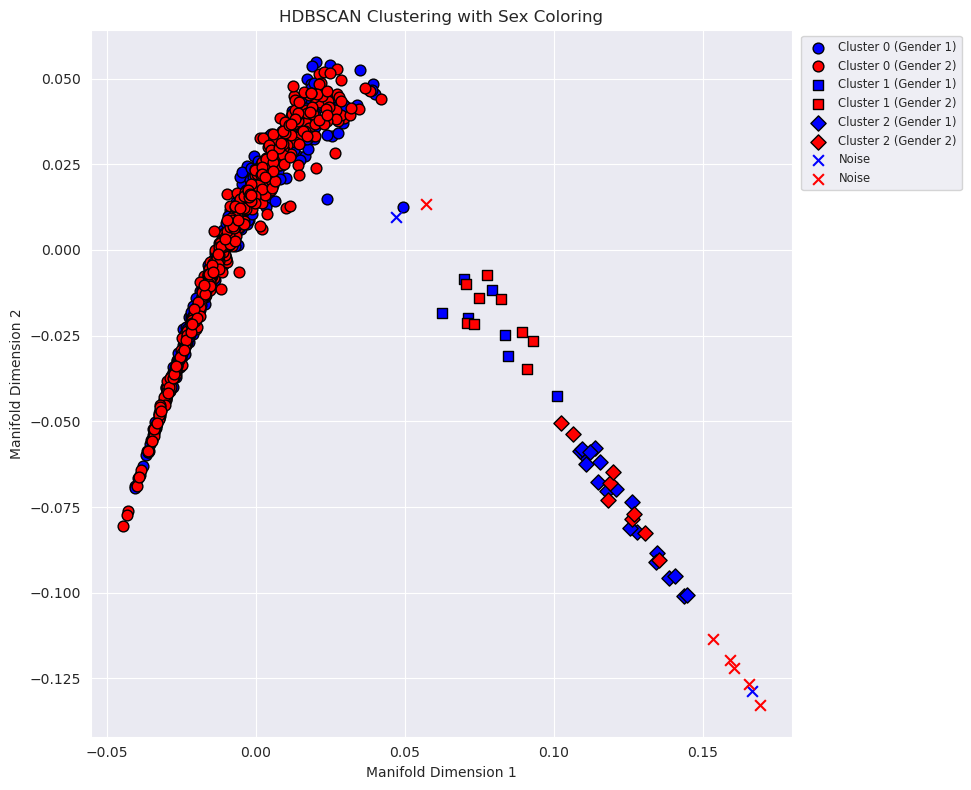

Gender Counts per Cluster:
   Cluster  Male  Female
0        0   450     463
1        1     7       9
2        2    19       9
3       -1     2       6


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert gender to a NumPy array for element-wise comparison
gender = np.array(COPDGene_clinical_dataset['gender'].tolist())
gender = np.array(COPDGene_clinical_dataset_P2['gender'].tolist())

# Initialize a dictionary to store cluster and gender counts
cluster_gender_counts = {}

# Step 4: Visualize clusters with sex and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {1: 'blue', 2: 'red'}  # Define colors for gender

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_gender_counts[k] = {'Male': 0, 'Female': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for gender_i, gender_name in zip([1, 2], ['Male', 'Female']):
        gender_mask = (gender == gender_i)  # Perform element-wise comparison
        final_mask = class_member_mask & gender_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count males and females in the cluster
        cluster_gender_counts[k][gender_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[gender_i],
                        edgecolor='k', s=60, label=f"{cluster_name} (Gender {gender_i})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[gender_i],
                        s=60, label=f"{cluster_name} (Gender {gender_i})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Sex Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_gender_counts dictionary
cluster_gender_df = pd.DataFrame(cluster_gender_counts).T.reset_index()
cluster_gender_df.columns = ['Cluster', 'Male', 'Female']

# Display the table
print("Gender Counts per Cluster:")
print(cluster_gender_df)

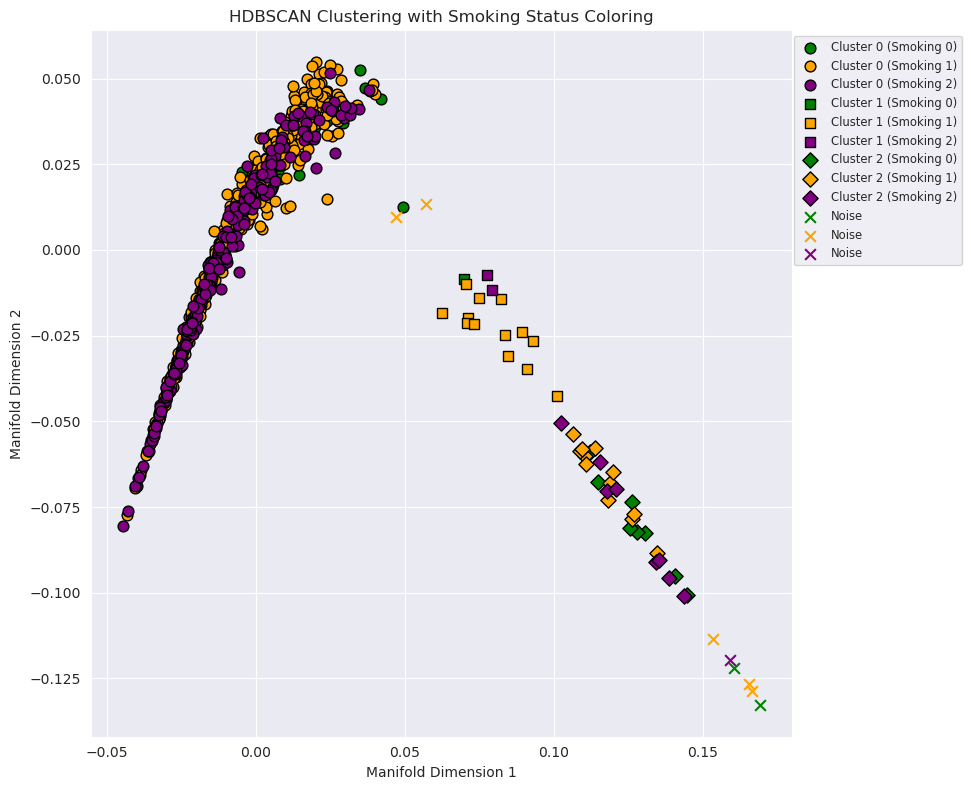

Smoking Status Counts per Cluster:
   Cluster  Never Smoked  Former Smoker  Current Smoker
0        0            54            656             203
1        1             1             13               2
2        2             8             12               8
3       -1             2              5               1


In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert smoking status to a NumPy array for element-wise comparison
smoking_status = np.array(COPDGene_clinical_dataset['smoking_status'].tolist())
smoking_status = np.array(COPDGene_clinical_dataset_P2['smoking_status'].tolist())

# Initialize a dictionary to store cluster and smoking status counts
cluster_smoking_counts = {}

# Step 4: Visualize clusters with smoking status and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {0: 'green', 1: 'orange', 2: 'purple'}  # Define colors for smoking status

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_smoking_counts[k] = {'Never Smoked': 0, 'Former Smoker': 0, 'Current Smoker': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for smoking_status_i, smoking_name in zip([0, 1, 2], ['Never Smoked', 'Former Smoker', 'Current Smoker']):
        smoking_mask = (smoking_status == smoking_status_i)  # Perform element-wise comparison
        final_mask = class_member_mask & smoking_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count smoking status in the cluster
        cluster_smoking_counts[k][smoking_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[smoking_status_i],
                        edgecolor='k', s=60, label=f"{cluster_name} (Smoking {smoking_status_i})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[smoking_status_i],
                        s=60, label=f"{cluster_name} (Smoking {smoking_status_i})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Smoking Status Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_smoking_counts dictionary
cluster_smoking_df = pd.DataFrame(cluster_smoking_counts).T.reset_index()
cluster_smoking_df.columns = ['Cluster', 'Never Smoked', 'Former Smoker', 'Current Smoker']

# Display the table
print("Smoking Status Counts per Cluster:")
print(cluster_smoking_df)

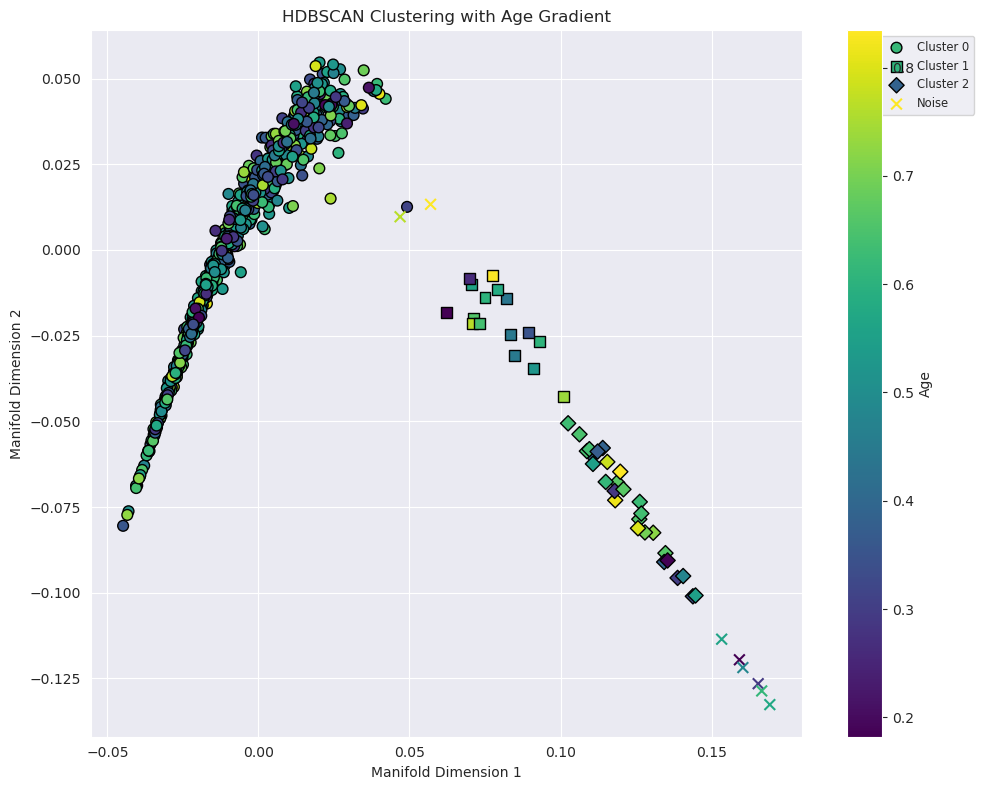

Age Statistics per Cluster:
   Cluster   Mean Age  Median Age  Min Age  Max Age  StdDev Age
0        0  67.438226       67.80     45.1     87.4    8.935357
1        1  69.993750       71.50     52.4     84.5    8.518397
2        2  70.717857       73.30     55.1     81.4    6.955576
3       -1  67.850000       69.05     52.8     80.4    8.682166


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

# Convert age to a NumPy array
age = np.array(COPDGene_clinical_dataset['age_visit'].tolist())
age = np.array(COPDGene_clinical_dataset_P2['age_visit'].tolist())

# Step 4: Visualize clusters with age and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
cmap = cm.viridis  # Color map for age gradient

unique_labels = set(labels)

# Initialize a dictionary to store age statistics for each cluster
cluster_age_stats = {}

# Create a scatter plot and keep a reference for the color bar
scatter = None

for k, shape in zip(unique_labels, shapes):
    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    # Scatter plot for each cluster
    xy = manifold[class_member_mask]  # Points in the cluster
    ages = age[class_member_mask]  # Corresponding ages

    # Calculate age statistics for the cluster
    cluster_age_stats[k] = {
        "Mean": np.mean(ages),
        "Median": np.median(ages),
        "Min": np.min(ages),
        "Max": np.max(ages),
        "StdDev": np.std(ages)
    }

    # Map ages to colors
    normalized_ages = (ages - age.min()) / (age.max() - age.min())  # Normalize ages for colormap
    scatter = plt.scatter(xy[:, 0], xy[:, 1], marker=shape, c=normalized_ages, cmap=cmap,
                          edgecolor='k' if shape in ['o', 's', 'D', '^', 'v'] else None,
                          s=60, label=f"{cluster_name}" if k != -1 else "Noise")

# Add color bar using the scatter plot's colormap and normalization
cbar = plt.colorbar(scatter)
cbar.set_label('Age')

# Add title and legend
plt.title("HDBSCAN Clustering with Age Gradient")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame for the cluster age statistics
cluster_age_df = pd.DataFrame(cluster_age_stats).T.reset_index()
cluster_age_df.columns = ['Cluster', 'Mean Age', 'Median Age', 'Min Age', 'Max Age', 'StdDev Age']

# Display the table
print("Age Statistics per Cluster:")
print(cluster_age_df)

In [14]:
###### Other Clinical Variables ######
COPDGene_clinical_dataset['AWT_seg_Thirona'].unique() 
# Waist_CM -> Continuous
# distwalked -> Continous
# 'race', 'BMI', 'Waist_CM',
#                            'Chronic_Bronchitis', 'PRM_pct_airtrapping_Thirona', 'PRM_pct_emphysema_Thirona',
#                            'PRM_pct_normal_Thirona', 'Pi10_Thirona', 'AWT_seg_Thirona', 'WallAreaPct_seg_Thirona',
#                            'DLco_GLI_tr_pp', 'FRC_TLC_ratio_Thirona', 'distwalked', 'SF36_PCS_score',
#                            'SF36_MCS_score', 'comorbidities']


array([1.04242173, 0.99881799, 1.066199  , 0.95660257, 0.91113544,
       0.93971867, 1.23834768, 1.12175923, 1.02926533, 0.83519921,
       0.73628671, 0.7086315 , 0.76547786, 0.82537033, 0.78906717,
       0.75140516, 0.74650792, 0.69995633, 1.22618127, 1.15875512,
       1.07213383, 0.95432234, 0.88294753, 0.8925622 , 1.2850525 ,
       1.22074549, 1.34541683, 0.94395633, 0.93901028, 0.903578  ,
       0.98267478, 1.05386424, 1.01244933, 0.99846556, 0.95622488,
       0.85662733, 0.89992161, 1.05096224, 1.25204133, 0.83038921,
       0.8489761 , 0.91674567, 1.43809613, 1.63166757, 1.14294833,
       1.13354464, 1.16744682, 1.080107  , 0.74256275, 0.88873564,
       0.97916667, 0.84502475, 0.74002748, 0.962324  , 1.25722634,
       1.09424841, 1.09099717, 1.15307298, 1.27811826, 1.27248233,
       1.04515846, 1.16298628, 1.16651917, 0.95363963, 0.98978839,
       0.99252633, 0.94775233, 0.89674714, 1.13192167, 1.24145353,
       1.26658715, 1.2893915 , 1.18479629, 1.19357335, 1.22679

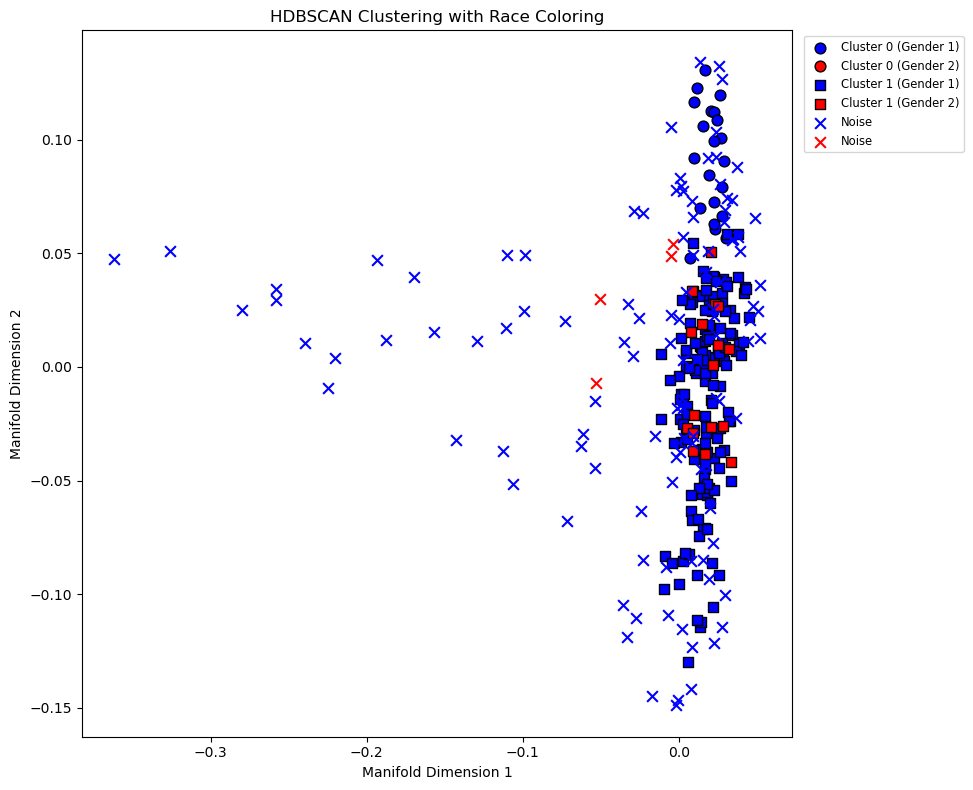

Race Counts per Cluster:
   Cluster  White  African American
0        0     21                 0
1        1    151                17
2       -1    113                 4


In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert race to a NumPy array for element-wise comparison
race = np.array(COPDGene_clinical_dataset['race'].tolist())

# Initialize a dictionary to store cluster and gender counts
cluster_race_counts = {}

# Step 4: Visualize clusters with sex and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {1: 'blue', 2: 'red'}  # Define colors for race

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_race_counts[k] = {'White': 0, 'African American': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for race_i, race_name in zip([1, 2], ['White', 'African American']):
        race_mask = (race == race_i)  # Perform element-wise comparison
        final_mask = class_member_mask & race_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count males and females in the cluster
        cluster_race_counts[k][race_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[race_i],
                        edgecolor='k', s=60, label=f"{cluster_name} (Gender {race_i})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[race_i],
                        s=60, label=f"{cluster_name} (Gender {race_i})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Race Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_race_counts dictionary
cluster_race_df = pd.DataFrame(cluster_race_counts).T.reset_index()
cluster_race_df.columns = ['Cluster', 'White', 'African American']

# Display the table
print("Race Counts per Cluster:")
print(cluster_race_df)

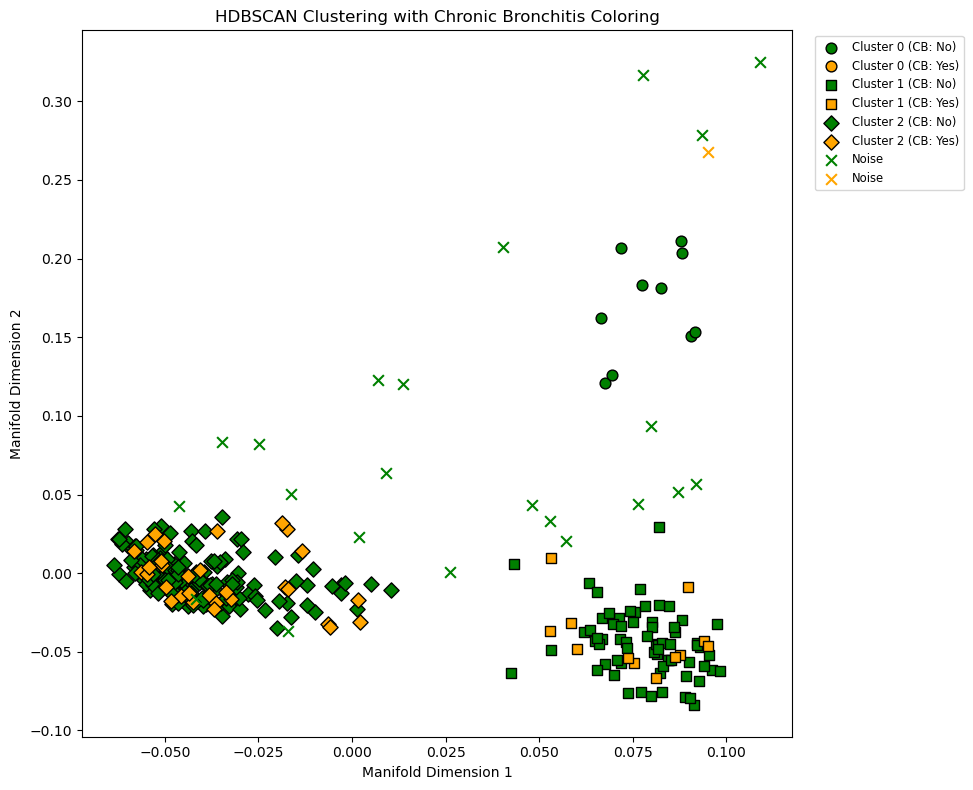

Chronic Bronchitis Counts per Cluster:
   Cluster   No  Yes
0        0   10    0
1        1   68   12
2        2  162   31
3       -1   22    1


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert Chronic_Bronchitis to a NumPy array for element-wise comparison
chronic_bronchitis = np.array(COPDGene_clinical_dataset['Chronic_Bronchitis'].tolist())

# Initialize a dictionary to store cluster and chronic bronchitis counts
cluster_cb_counts = {}

# Step 4: Visualize clusters with Chronic_Bronchitis and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {0: 'green', 1: 'orange'}  # Define colors for Chronic_Bronchitis (0: No, 1: Yes)

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_cb_counts[k] = {'No': 0, 'Yes': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for cb_status, cb_name in zip([0, 1], ['No', 'Yes']):
        cb_mask = (chronic_bronchitis == cb_status)  # Perform element-wise comparison
        final_mask = class_member_mask & cb_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count "No" and "Yes" in the cluster
        cluster_cb_counts[k][cb_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[cb_status],
                        edgecolor='k', s=60, label=f"{cluster_name} (CB: {cb_name})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[cb_status],
                        s=60, label=f"{cluster_name} (CB: {cb_name})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Chronic Bronchitis Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_cb_counts dictionary
cluster_cb_df = pd.DataFrame(cluster_cb_counts).T.reset_index()
cluster_cb_df.columns = ['Cluster', 'No', 'Yes']

# Display the table
print("Chronic Bronchitis Counts per Cluster:")
print(cluster_cb_df)

In [17]:
trimmed['cluster'] = labels
# Creating a SeqID -> TargetName Mapping
COPDGene_metadata = pd.read_csv('/home/shussein/NetCO/data/COPDGene/copdg_soma_5k_p3_meta_Jan23.csv', index_col=0)
seqID_targetName_mapping = dict(zip(COPDGene_metadata.index, COPDGene_metadata['TargetFullName']))
seqID_targetName_mapping

{'X10000_28': 'Beta-crystallin B2',
 'X10001_7': 'RAF proto-oncogene serine/threonine-protein kinase',
 'X10003_15': 'Zinc finger protein 41',
 'X10006_25': 'ETS domain-containing protein Elk-1',
 'X10008_43': 'Guanylyl cyclase-activating protein 1',
 'X10011_65': 'Inositol polyphosphate 5-phosphatase OCRL-1',
 'X10012_5': 'SAM pointed domain-containing Ets transcription factor',
 'X10014_31': 'Zinc finger protein SNAI2',
 'X10015_119': 'Voltage-gated potassium channel subunit beta-2',
 'X10022_207': 'DNA polymerase eta',
 'X10023_32': 'Vitamin D3 receptor',
 'X10024_44': '4-hydroxy-2-oxoglutarate aldolase, mitochondrial',
 'X10030_8': 'Adenine DNA glycosylase',
 'X10035_6': 'Dual specificity protein phosphatase 4',
 'X10036_201': 'Zinc fingers and homeoboxes protein 3',
 'X10037_98': 'Sialic acid-binding Ig-like lectin 12:Ig-like V-type 2 domain, Isoform long',
 'X10040_63': 'Tumor protein 63',
 'X10041_3': 'Hepatocyte nuclear factor 4-alpha',
 'X10042_8': 'Serine/threonine-protein ki

In [18]:
from itertools import combinations
# Interpreting the Clusters
# 1. Attempting to Develop Omics Profiles for the Clusters
import pandas as pd
from scipy.stats import ttest_ind
# Separate clusters
clusters = trimmed['cluster'].unique()
cluster_profiles = {}

# Compute summary statistics
for cluster in clusters:
    cluster_data = trimmed[trimmed['cluster'] == cluster]
    cluster_profiles[cluster] = cluster_data.describe()  # Mean, std, etc.

# Compare omics across clusters (pairwise t-test)
omics_features = [col for col in trimmed.columns if col.startswith('X')]
stats = []
for omics in omics_features:
    for c1, c2 in combinations(clusters, 2):
        cluster1_data = trimmed[trimmed['cluster'] == c1][omics]
        cluster2_data = trimmed[trimmed['cluster'] == c2][omics]
        t_stat, p_value = ttest_ind(cluster1_data, cluster2_data, equal_var=False)
        stats.append({'Omics': omics, 'Cluster1': c1, 'Cluster2': c2, 'p-value': p_value})

# Convert results to DataFrame and filter significant omics
stats_df = pd.DataFrame(stats)
stats_df['TargetFullName'] = stats_df['Omics'].map(seqID_targetName_mapping)
significant_omics = stats_df[stats_df['p-value'] < 0.05]
significant_omics

,Omics,Cluster1,Cluster2,p-value,TargetFullName
9,X5358_3,2,1,4.142552e-05,Osteomodulin
10,X5358_3,2,0,1.519496e-02,Osteomodulin
13,X5315_22,-1,1,3.213818e-02,"Troponin T, cardiac muscle"
14,X5315_22,-1,0,1.452298e-03,"Troponin T, cardiac muscle"
15,X5315_22,2,1,6.069860e-19,"Troponin T, cardiac muscle"
...,...,...,...,...,...
174,X3853_56,-1,2,8.927006e-03,"Malate dehydrogenase, cytoplasmic"
175,X3853_56,-1,1,1.883432e-04,"Malate dehydrogenase, cytoplasmic"
177,X3853_56,2,1,3.056919e-47,"Malate dehydrogenase, cytoplasmic"
178,X3853_56,2,0,1.855717e-06,"Malate dehydrogenase, cytoplasmic"


In [19]:
# Create a dictionary to store significant omics for each pair of clusters
significant_omics_between_clusters = {}

# Iterate over all pairs of clusters
for c1, c2 in combinations(clusters, 2):
    # Filter rows in stats_df where the comparison is between the current pair of clusters
    pairwise_comparison = stats_df[
        ((stats_df['Cluster1'] == c1) & (stats_df['Cluster2'] == c2)) |
        ((stats_df['Cluster1'] == c2) & (stats_df['Cluster2'] == c1))
        ]

    # Filter significant omics (p-value < 0.05)
    significant_for_pair = pairwise_comparison[pairwise_comparison['p-value'] < 0.05]

    # Extract the significant omics
    omics_significant = significant_for_pair['Omics'].unique()

    # Add the results to the dictionary
    significant_omics_between_clusters[f"{c1} vs {c2}"] = omics_significant

# Flatten the dictionary into a list of rows for each pair and omics
flattened_data = [
    {"Cluster Pair": cluster_pair, "Significant Omics": omics}
    for cluster_pair, omics_list in significant_omics_between_clusters.items()
    for omics in omics_list
]

# Create the DataFrame from the flattened list
pairwise_summary = pd.DataFrame(flattened_data)
pairwise_summary

,Cluster Pair,Significant Omics
0,-1 vs 2,X3332_57
1,-1 vs 2,X3066_12
2,-1 vs 2,X4337_49
3,-1 vs 2,X4568_17
4,-1 vs 2,X4541_49
...,...,...
95,1 vs 0,X11105_171
96,1 vs 0,X3858_5
97,1 vs 0,X5440_26
98,1 vs 0,X2647_66


In [20]:
cluster_comparison = significant_omics[(significant_omics['Cluster1'] == 1) &
                                       (significant_omics['Cluster2'] == 2)]
print("Significant features differentiating Cluster 0 and 1:")
print(cluster_comparison)


Significant features differentiating Cluster 0 and 1:
Empty DataFrame
Columns: [Omics, Cluster1, Cluster2, p-value, TargetFullName]
Index: []


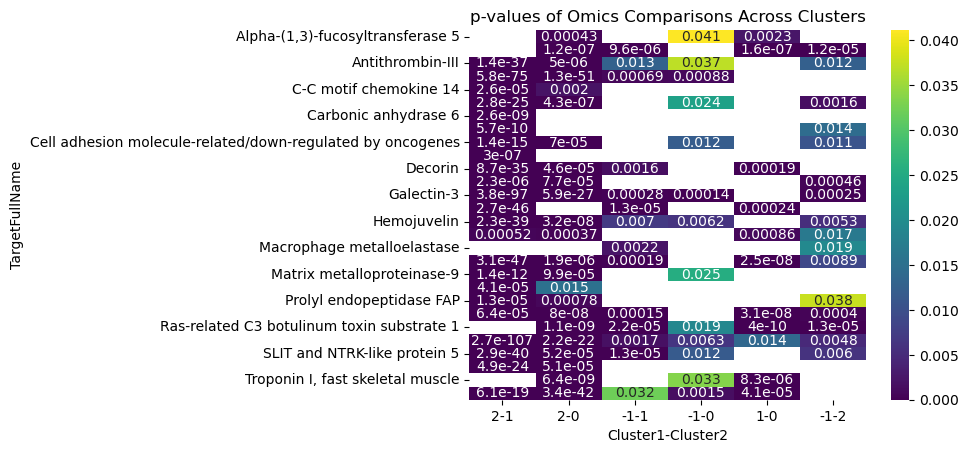

In [22]:
import seaborn as sns

heatmap_data = significant_omics.pivot(index='TargetFullName', columns=['Cluster1', 'Cluster2'], values='p-value')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2g")
plt.title("p-values of Omics Comparisons Across Clusters")
plt.show()


Top features defining clusters:
Ras-related C3 botulinum toxin substrate 1                  3.226167
Rab GDP dissociation inhibitor beta                         2.756164
Alpha-enolase                                               2.598981
Malate dehydrogenase, cytoplasmic                           2.299268
Low molecular weight phosphotyrosine protein phosphatase    2.260184
Galectin-3                                                  1.867866
Repulsive guidance molecule A                               1.813522
SLIT and NTRK-like protein 5                                1.712479
Apolipoprotein E                                            1.602934
Gelsolin                                                    1.563891
dtype: float64


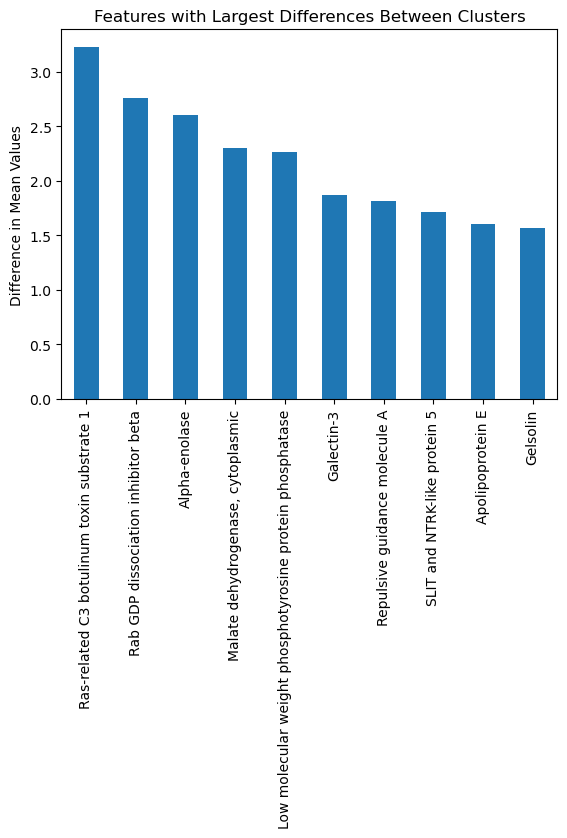

In [23]:
# Compute cluster centroids
centroids = trimmed.groupby('cluster')[omics_features].mean()

# Find features with largest differences between centroids
centroid_diff = centroids.max() - centroids.min()
top_features = centroid_diff.nlargest(10)

top_features = top_features.rename(index=seqID_targetName_mapping)
print("Top features defining clusters:")
print(top_features)

# Plot the differences
top_features.plot(kind='bar')
plt.title("Features with Largest Differences Between Clusters")
plt.ylabel("Difference in Mean Values")
plt.show()


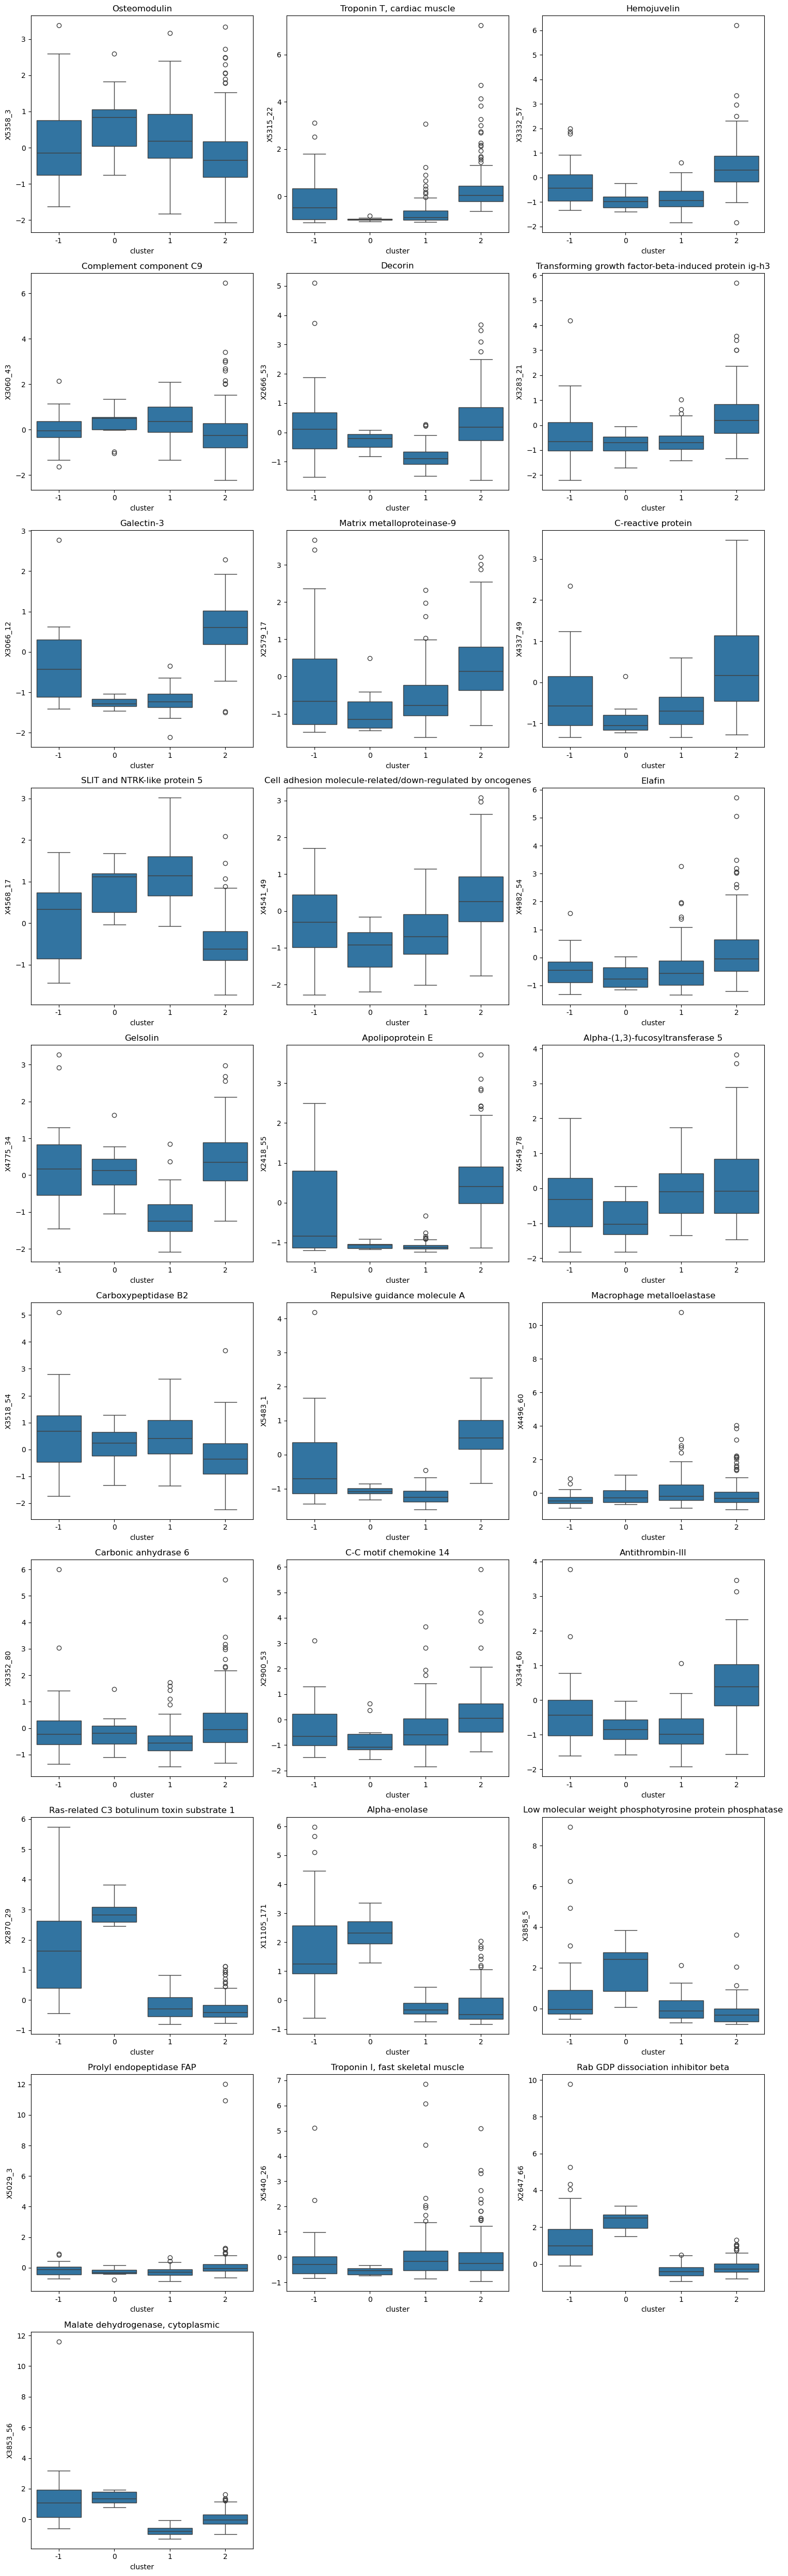

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Boxplots for significant omics features
significant_omics_list = significant_omics['Omics'].unique()

# Define the grid size (e.g., 3 plots per row)
n_cols = 3
n_rows = math.ceil(len(significant_omics_list) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Adjust figure size
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Create a boxplot for each significant omics feature
for i, omics in enumerate(significant_omics_list):
    sns.boxplot(data=trimmed, x='cluster', y=omics, ax=axes[i])
    axes[i].set_title(f"{seqID_targetName_mapping[omics]}")

# Remove any empty subplots (if significant_omics_list isn't a multiple of n_cols)
for j in range(len(significant_omics_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import shap
import matplotlib.pyplot as plt

# Replacing -1 (Noise Points) with 2
trimmed['cluster'] = trimmed['cluster'].replace(-1, 3)

# Step 1: Train a model
X = trimmed.loc[:, ~trimmed.columns.isin(['cluster'])]
y = trimmed['cluster'].astype(int)      # Cluster labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

/home/shussein/anaconda3/envs/ManifoldLearning/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.88      1.00      0.94        15
           2       0.95      1.00      0.97        36
           3       0.50      0.38      0.43         8

    accuracy                           0.87        62
   macro avg       0.58      0.59      0.58        62
weighted avg       0.83      0.87      0.85        62



SHAP Summary Plot for Class 0


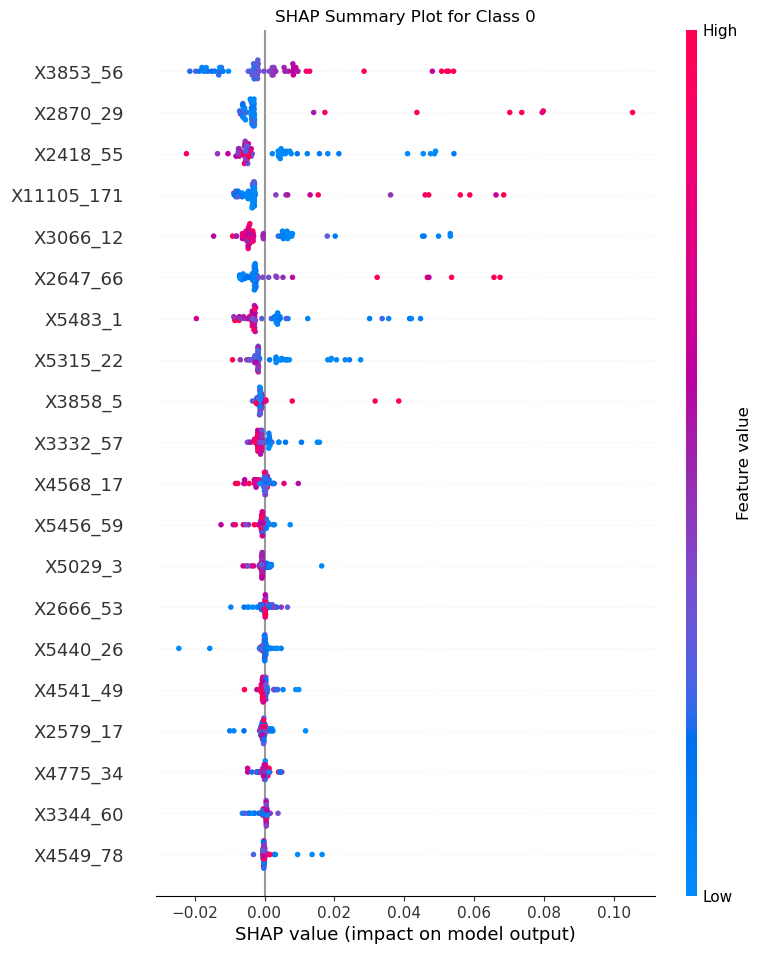

SHAP Summary Plot for Class 1


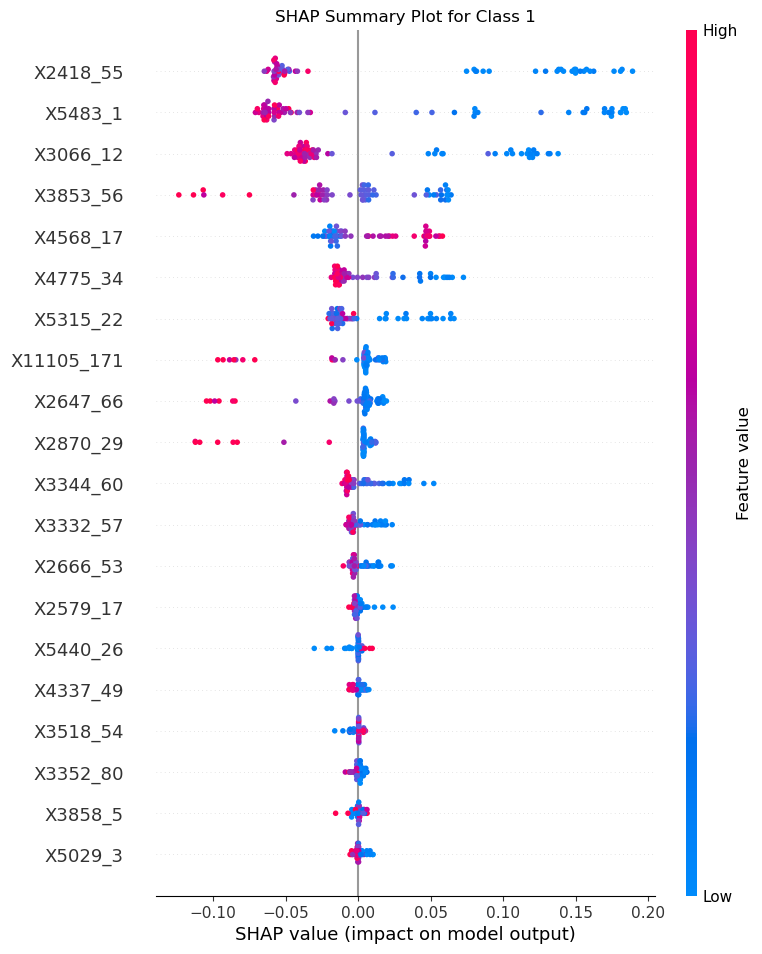

SHAP Summary Plot for Class 2


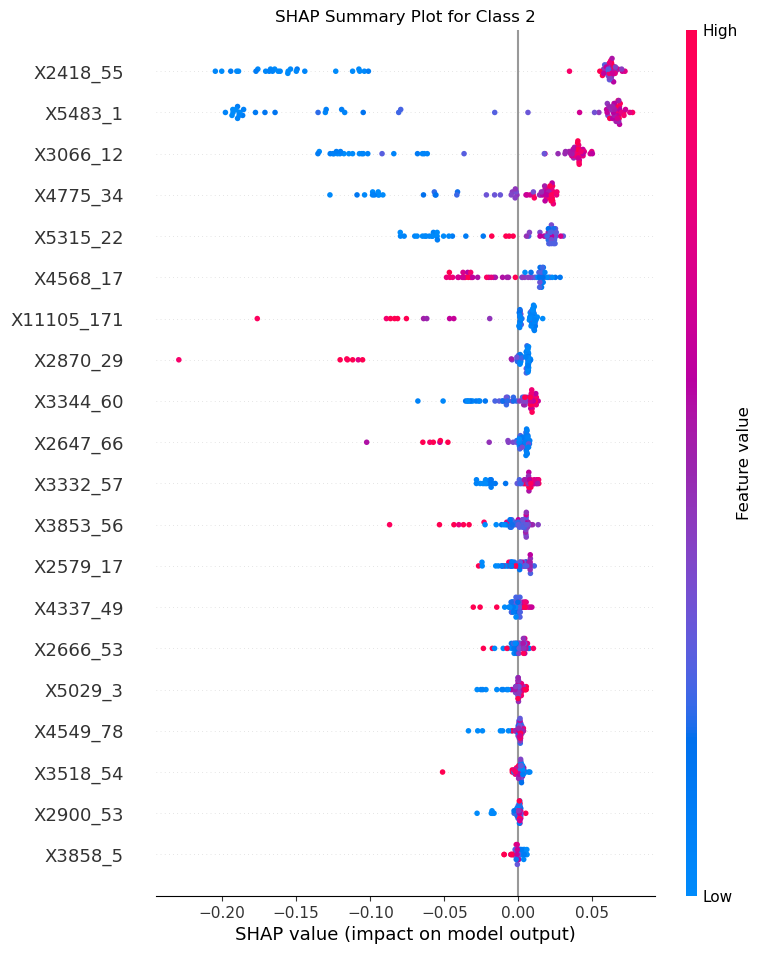

SHAP Summary Plot for Class 3


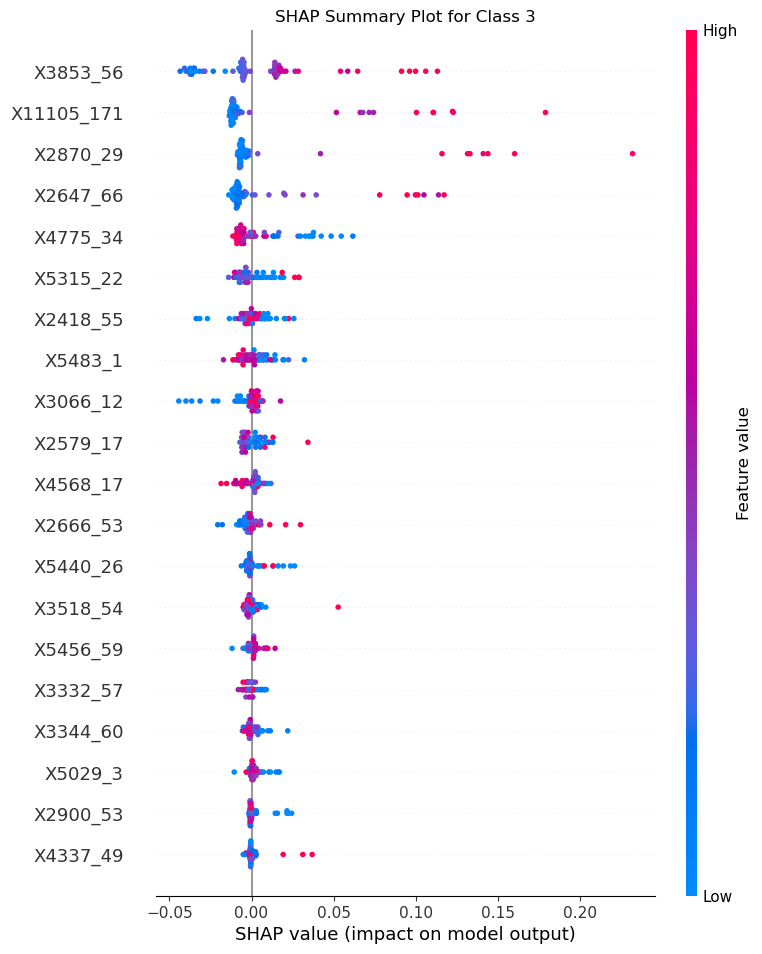

In [27]:
# SHAP explanation
explainer = shap.Explainer(rf_model, X_train)  # Use TreeExplainer for tree-based models
shap_values = explainer(X_test)
X_test_renamed = X_test.rename(columns=seqID_targetName_mapping)

# Summary plot for SHAP values (requires class-specific handling for multiclass)
for class_index in set(list(y_test.tolist())):
    print(f"SHAP Summary Plot for Class {class_index}")
    shap.summary_plot(shap_values[..., class_index], X_test_renamed, show=False)
    plt.title(f"SHAP Summary Plot for Class {class_index}")
    plt.show()

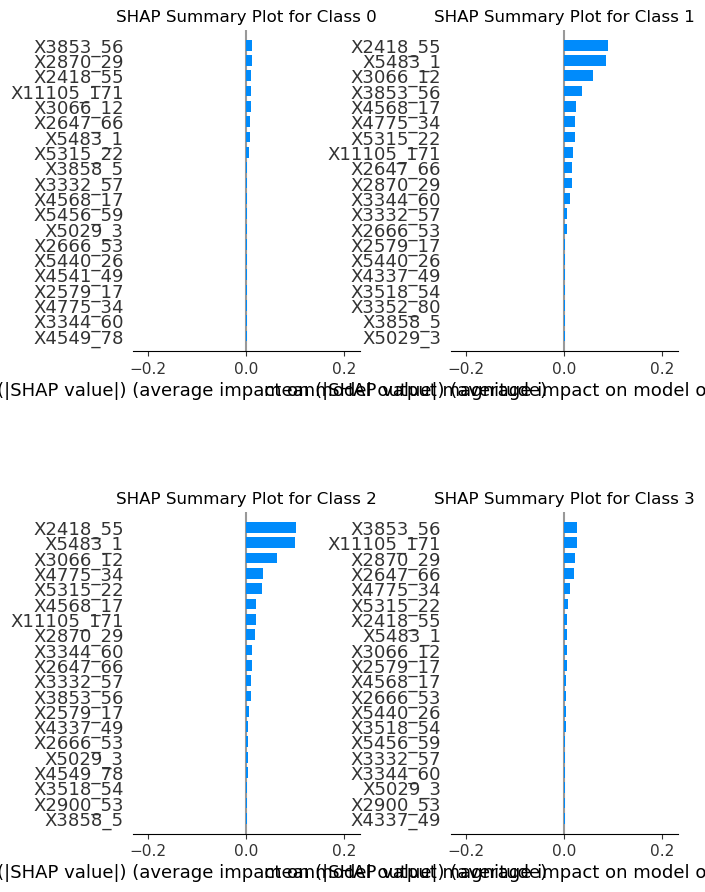

In [28]:
import matplotlib.pyplot as plt
import shap
import math

# SHAP explanation
explainer = shap.Explainer(rf_model, X_train)  # Use TreeExplainer for tree-based models
shap_values = explainer(X_test)

X_test_renamed = X_test.rename(columns=seqID_targetName_mapping)
# Number of classes
num_classes = len(set(y_test))

# Determine the global x-axis range
x_min = shap_values.values.min()
x_max = shap_values.values.max()

# Determine grid size: multiple rows with 2 plots per row
n_cols = 2  # Number of columns in the grid
n_rows = math.ceil(num_classes / n_cols)  # Compute rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), sharex=True)

# Flatten axes for easier indexing if grid has multiple rows and columns
axes = axes.flatten()

# Plot SHAP summary plots for each class
for class_index, ax in zip(range(num_classes), axes):
    plt.sca(ax)  # Set the current axis for SHAP to draw on
    shap.summary_plot(
        shap_values[..., class_index],
        X_test_renamed,
        show=False,
        plot_type="bar"
    )
    ax.set_xlim(x_min, x_max)  # Set shared x-axis range
    ax.set_title(f"SHAP Summary Plot for Class {class_index}")

# Remove any empty axes (if num_classes is not a perfect multiple of n_cols)
for i in range(num_classes, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to accommodate long y-axis labels
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave room for titles and labels
plt.subplots_adjust(left=0.3, hspace=0.5, wspace=0.4)  # Increase space for y-labels
plt.show()

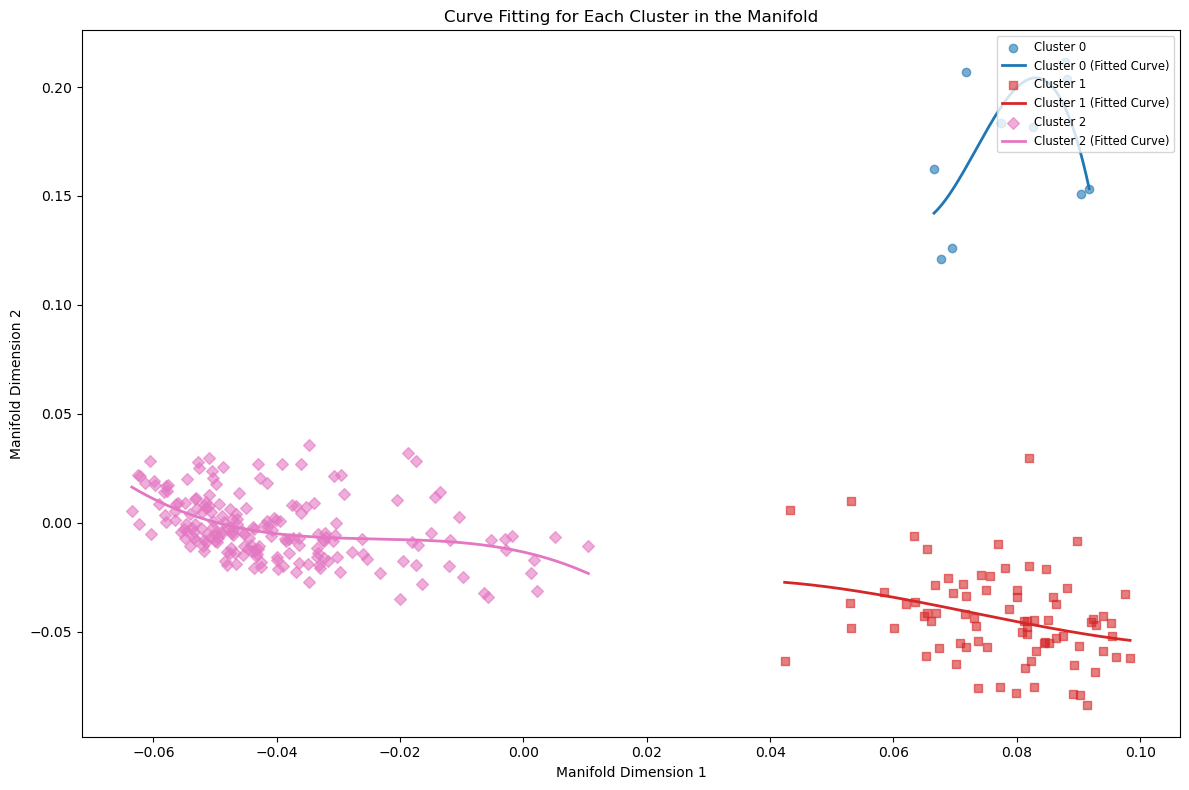

In [29]:
# Modeling Regions of the Manifold
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Extract unique labels (clusters)
unique_labels = set(labels)

# Step 1: Visualize clusters and fit curves
plt.figure(figsize=(12, 8))
shapes = ['o', 's', 'D', '^', 'v']  # Shapes for clusters
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # Colormap for clusters

for k, color, shape in zip(unique_labels, colors, shapes):
    if k == -1:
        continue  # Skip noise points

    cluster_name = f"Cluster {k}"
    class_member_mask = (labels == k)
    xy = manifold[class_member_mask]  # Points in the cluster

    # Step 2: Scatter plot of points in the cluster
    plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=color, label=cluster_name, alpha=0.6)

    # Step 3: Fit a curve to the cluster points
    # Sort points by x to make curve fitting easier
    xy = xy[np.argsort(xy[:, 0])]
    x, y = xy[:, 0], xy[:, 1]

    # Fit a polynomial of degree 3 (can adjust degree as needed)
    p = Polynomial.fit(x, y, deg=3)

    # Generate points along the fitted curve
    x_fit = np.linspace(x.min(), x.max(), 500)
    y_fit = p(x_fit)

    # Step 4: Plot the fitted curve
    plt.plot(x_fit, y_fit, '-', color=color, linewidth=2, label=f"{cluster_name} (Fitted Curve)")

# Add title, legend, and labels
plt.title("Curve Fitting for Each Cluster in the Manifold")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()


/home/shussein/anaconda3/envs/ManifoldLearning/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/shussein/anaconda3/envs/ManifoldLearning/lib/python3.9/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


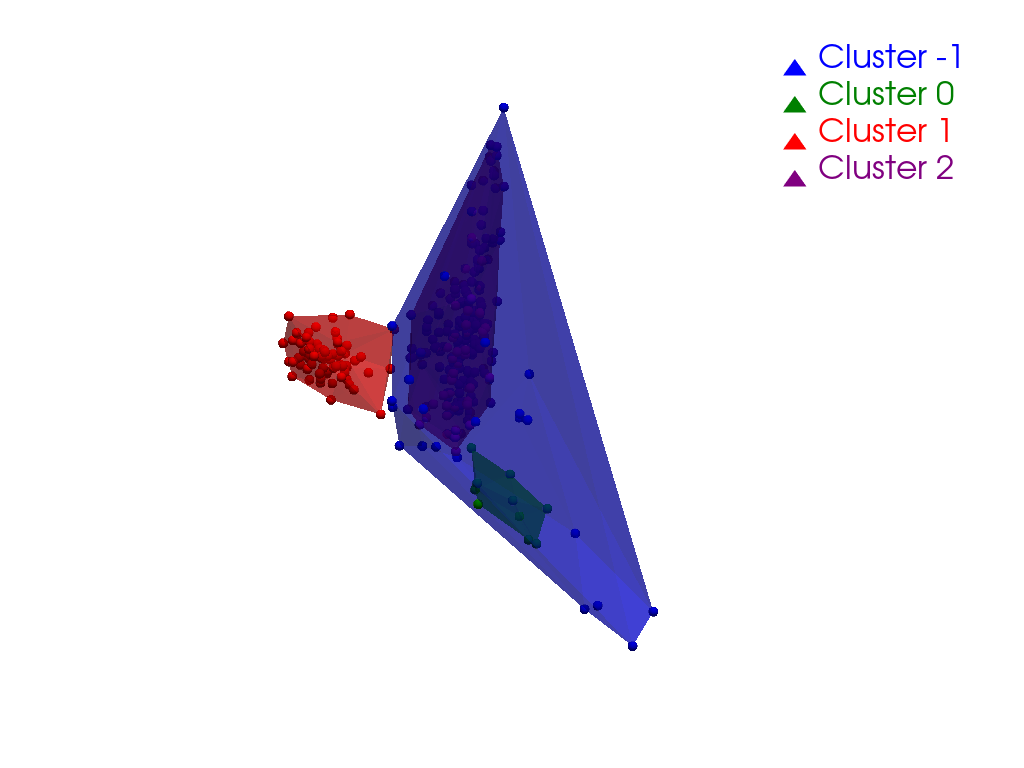

In [33]:
import numpy as np
import pyvista as pv

# Example: Points in all clusters
unique_labels = np.unique(labels)  # Get unique cluster labels

# Initialize the PyVista plotter
plotter = pv.Plotter()

# Colors for each cluster
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan']  # Extend this if you have more clusters

# Iterate through each cluster
for i, cluster_label in enumerate(unique_labels):
    cluster_points = manifold[labels == cluster_label]  # Points belonging to the current cluster

    # Create a PyVista point cloud
    point_cloud = pv.PolyData(cluster_points)

    # Generate an alpha shape (volume representation)
    alpha = 5.0  # Adjust alpha value for desired level of concavity
    volume = point_cloud.delaunay_3d(alpha=alpha)

    # Extract surface for visualization
    surface = volume.extract_geometry()

    # Add the surface and points to the plotter
    plotter.add_mesh(surface, color=colors[i % len(colors)], opacity=0.5, label=f"Cluster {cluster_label}")
    plotter.add_points(cluster_points, color=colors[i % len(colors)], point_size=10, render_points_as_spheres=True)

# Add legend and show the plot
plotter.add_legend()
plotter.show()

In [39]:
import numpy as np
from sklearn.neighbors import KernelDensity
import pyvista as pv

# Example: Points in a cluster
cluster_points = manifold[labels == 0]  # Replace with your actual cluster data

# Fit a kernel density model
kde = KernelDensity(bandwidth=0.5)  # Adjust bandwidth to control smoothing
kde.fit(cluster_points)

# Define a 3D grid to evaluate the density
x = np.linspace(cluster_points[:, 0].min(), cluster_points[:, 0].max(), 50)
y = np.linspace(cluster_points[:, 1].min(), cluster_points[:, 1].max(), 50)
z = np.linspace(cluster_points[:, 2].min(), cluster_points[:, 2].max(), 50)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Create a grid for evaluation
grid_points = np.c_[X.ravel(), Y.ravel(), Z.ravel()]

# Evaluate the density on the grid
density = np.exp(kde.score_samples(grid_points)).reshape(X.shape)

# Create a PyVista UniformGrid object
grid = pv.UniformGrid()
grid.dimensions = X.shape
grid.origin = (x[0], y[0], z[0])  # Grid origin
grid.spacing = (
    x[1] - x[0],
    y[1] - y[0],
    z[1] - z[0],
)  # Spacing between points

# Add density values as scalars to the grid
grid['density'] = density.ravel()

# Extract an isosurface at a specific density level
iso_surface = grid.contour([0.02])  # Adjust level to control surface detail

# Visualize the KDE-based volume
plotter = pv.Plotter()
plotter.add_mesh(iso_surface, color='lightblue', opacity=0.5)
plotter.add_points(cluster_points, color='red', point_size=10, render_points_as_spheres=True)
plotter.show()


AttributeError: module 'pyvista' has no attribute 'UniformGrid'

PyVista version: 0.44.2
Available attributes: ['AVSucdReader', 'AmbiguousDataError', 'AnnotatedIntEnum', 'ArrayLike', 'Arrow', 'ArrowSource', 'AxesGeometrySource', 'BMPReader', 'BUILDING_GALLERY', 'BYUReader', 'BaseReader', 'BinaryMarchingCubesReader', 'BoundsLike', 'Box', 'BoxSource', 'CGNSReader', 'Capsule', 'Cell', 'CellArray', 'CellArrayLike', 'CellType', 'CellsLike', 'Circle', 'CircularArc', 'CircularArcFromNormal', 'CompositeFilters', 'Cone', 'ConeSource', 'Cube', 'CubeSource', 'Cylinder', 'CylinderSource', 'CylinderStructured', 'DEFAULT_SCALARS_NAME', 'DEMReader', 'DICOMReader', 'DataObject', 'DataSet', 'DataSetAttributes', 'DataSetFilters', 'DeprecationError', 'Disc', 'DiscSource', 'Dodecahedron', 'Ellipse', 'EnSightReader', 'ExplicitStructuredGrid', 'FIGURE_PATH', 'FLOAT_FORMAT', 'FLUENTCFFReader', 'FacetReader', 'FieldAssociation', 'FluentReader', 'GESignaReader', 'GIFReader', 'GLTFReader', 'GPUInfo', 'GambitReader', 'GaussianCubeReader', 'Grid', 'HDFReader', 'HDRReader', 'ID

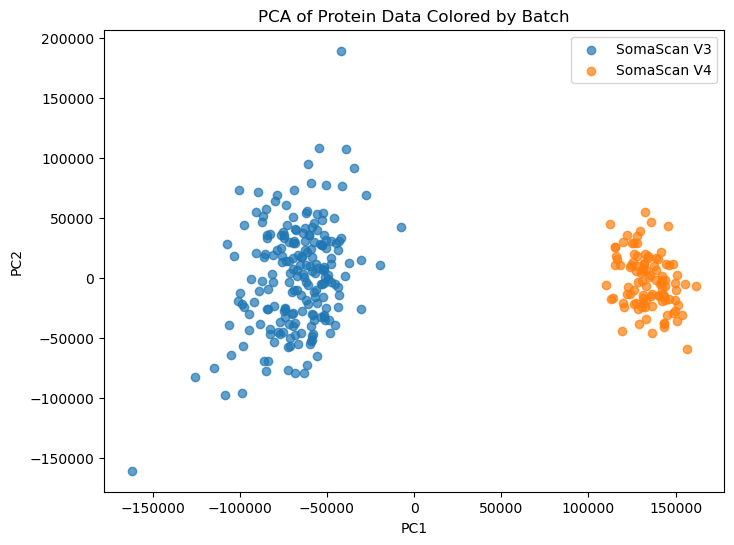

In [89]:
# Identifying and Visualizing Batch Effects - Visits 1 & 2 Proteins were Collected using SomaScan V3, while Visit 3 using SomaScan V4 - 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = COPDGene_dataset
df = df.reset_index()
# Select protein data
protein_columns = [col for col in df.columns if col.startswith('X')]
protein_data = df[protein_columns]

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(protein_data)

# Add batch information
df['Batch'] = df['Visitnum'].apply(lambda x: 'V3' if x in [1, 2] else 'V4')

# Plot PCA results
plt.figure(figsize=(8, 6))
for batch in df['Batch'].unique():
    subset = df[df['Batch'] == batch]
    plt.scatter(pca_results[subset.index, 0], pca_results[subset.index, 1], label=f'SomaScan {batch}', alpha=0.7)

plt.title('PCA of Protein Data Colored by Batch')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [92]:
# Correcting for Batch Effects
from combat.pycombat import pycombat

# Add batch information as a categorical column
df['Batch'] = df['Visitnum'].apply(lambda x: 'V3' if x in [1, 2] else 'V4')

# Apply ComBat to correct for batch effects
protein_data_corrected = pycombat(df[protein_columns].T, batch=df['Batch']).T

# Update the DataFrame
df[protein_columns] = protein_data_corrected


Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


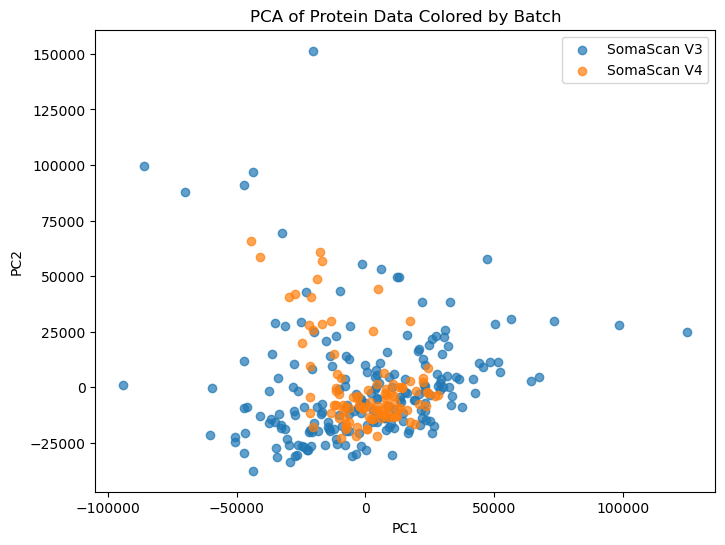

In [93]:
# Identifying and Visualizing Batch Effects - Visits 1 & 2 Proteins were Collected using SomaScan V3, while Visit 3 using SomaScan V4 - 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# df = COPDGene_dataset
# df = df.reset_index()
# Select protein data
protein_columns = [col for col in df.columns if col.startswith('X')]
protein_data = df[protein_columns]

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(protein_data)

# Add batch information
df['Batch'] = df['Visitnum'].apply(lambda x: 'V3' if x in [1, 2] else 'V4')

# Plot PCA results
plt.figure(figsize=(8, 6))
for batch in df['Batch'].unique():
    subset = df[df['Batch'] == batch]
    plt.scatter(pca_results[subset.index, 0], pca_results[subset.index, 1], label=f'SomaScan {batch}', alpha=0.7)

plt.title('PCA of Protein Data Colored by Batch')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [95]:
df

,SID,X10339_48,X11105_171,X11510_31,X13090_17,X14116_129,X2201_17,X2418_55,X2579_17,X2602_2,...,X5456_59,X5465_32,X5483_1,X5843_60,X6641_60,X7655_11,Visitnum,finalgold_visit,age_visit,Batch
0,10062C,9299.701003,54008.668875,32955.005521,4424.495150,2297.906306,56683.473981,39588.743371,15193.830288,4512.940870,...,5959.951916,1988.810072,15061.341633,830.485081,2430.289946,2451.093423,1,3.0,64.6,V3
1,10062C,4209.872198,11419.511172,29604.395967,2996.292451,2476.210703,59988.441872,28174.039195,24119.074478,4540.358909,...,4694.582671,1959.763232,14223.030940,716.646972,2478.439599,11192.182933,2,4.0,70.0,V3
2,10062C,6507.748733,12481.641589,29211.427188,2542.174670,2242.997555,54526.324241,38116.394056,23282.631663,6404.570937,...,5345.537599,2186.227662,15010.799679,833.636263,2211.609889,9475.987870,3,4.0,74.8,V4
3,10077P,9503.580400,12041.695585,38053.449053,3392.554543,2486.881569,55733.170763,34342.879966,13336.414007,4477.221257,...,8555.785031,2535.463684,15207.313935,915.533166,2562.010424,5532.255043,1,3.0,62.4,V3
4,10077P,3156.238066,6331.572693,29856.655937,2416.126293,2017.651881,55019.790557,43370.229265,22226.574980,4497.251658,...,6814.041482,2368.493758,14549.016129,1005.281662,1787.694585,8733.519893,2,3.0,67.8,V3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,21449L,4749.387877,8002.013771,28495.491505,1743.232789,2176.272858,56706.403330,30756.529219,20003.628510,4538.302556,...,5935.448967,2212.095299,14682.676924,747.640315,1379.611817,16203.334399,2,1.0,68.1,V3
302,21449L,8276.015852,11040.350242,29631.899827,2400.692333,2195.882185,54628.938361,37912.900772,22159.561985,4754.581115,...,6888.621063,2260.027867,15083.533278,930.381372,1981.421311,23400.041937,3,0.0,72.5,V4
303,22660M,7031.209458,55070.304620,30762.162742,3945.429710,2373.611772,52947.540397,48665.281413,20104.298877,4478.668321,...,6850.102425,2426.538037,15661.907786,892.031104,2048.371275,3396.843192,1,0.0,72.6,V3
304,22660M,4336.156752,4785.659979,29150.980197,2812.853572,2488.539879,57075.149701,45747.757193,18160.319374,4477.145096,...,5021.072902,2282.094230,15056.142351,1048.613588,2050.106977,5355.132256,2,0.0,77.5,V3


Reconstruction Error: 0.12370996623355013
Neighborhood Preservation Score: 0.2169934640522876
Pairwise Distance Preservation Score: 0.3978503666592268


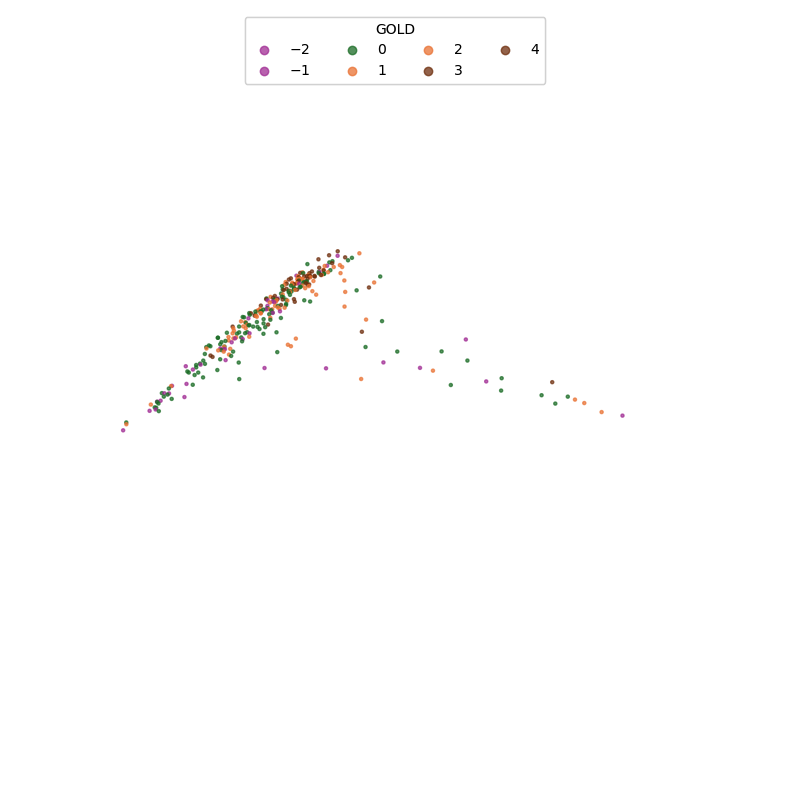

In [120]:
# A Simple Feature Selection Approach Prior to Running Manifold Learning LLE (Selecting the Top K-Related Features)
X = df.loc[:, ~df.columns.isin(['finalgold_visit', 'Visitnum', 'age_visit', 'SID', 'Batch'])]
# Select all Columns Except 'Visitnum' and 'finalgold_visit'
Y = df['finalgold_visit']
k = 30
corr = X[X.columns].corrwith(Y).abs().sort_values(ascending=False)
trimmed = X[corr[:k].index.tolist()]

# Standardize the dataset
scaler = StandardScaler()
trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

lle = LocallyLinearEmbedding(n_neighbors=15, n_components=3, reg=0.08533165867623197, max_iter=1000, random_state=42)
embedding = lle.fit_transform(trimmed)

# Evaluating the Quality of the Generated Manifold
reconstruction_error = lle.reconstruction_error_
neighborhood_preservation_score = compute_neighborhood_preservation(trimmed, embedding)
pairwise_distances_preservation_score_euclidean = compute_distance_preservation(trimmed, embedding)
pairwise_distances_preservation_score_manhattan = compute_distance_preservation(trimmed, embedding, 'manhattan')

print("Reconstruction Error: %s\nNeighborhood Preservation Score: %s\nPairwise Distance Preservation Score: %s" %
      (reconstruction_error,
       neighborhood_preservation_score,
       pairwise_distances_preservation_score_euclidean))
# Create a 3D scatter plot of the LLE embedding
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
custom_cmap = ListedColormap(['#A02B93', '#196B24', '#E97132', '#6E2D0C'])  # Red, Green, Blue, Yellow
sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=Y, s=5, alpha=0.7, cmap=custom_cmap)

legend1 = ax.legend(*sc.legend_elements(), loc="upper center", title="GOLD", ncol=4)
ax.add_artist(legend1)
ax.grid(False)
ax.set_axis_off()
fig.patch.set_alpha(0.0)

plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette Score: 0.50


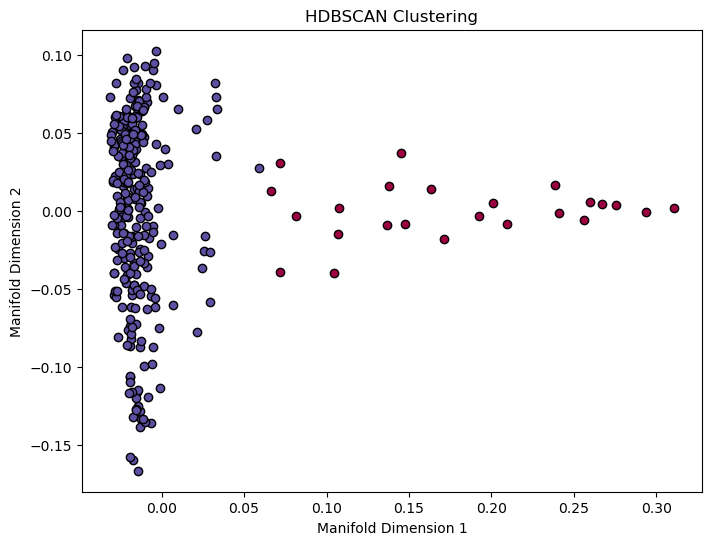

In [121]:
import numpy as np
import pandas as pd
import hdbscan
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Example: Assume `manifold` is a 2D or 3D array-like object (from LLE output)
manifold = embedding

# Step 1: Initialize HDBSCAN with parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, cluster_selection_epsilon=0.5)

# Step 2: Fit HDBSCAN
clusterer.fit(manifold)
labels = clusterer.labels_

# Step 3: Evaluate clustering
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# If more than one cluster is found, calculate silhouette score
if n_clusters > 1:
    silhouette = silhouette_score(manifold, labels)
    print(f"Silhouette Score: {silhouette:.2f}")

# Step 4: Visualize clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = manifold[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title("HDBSCAN Clustering")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.show()


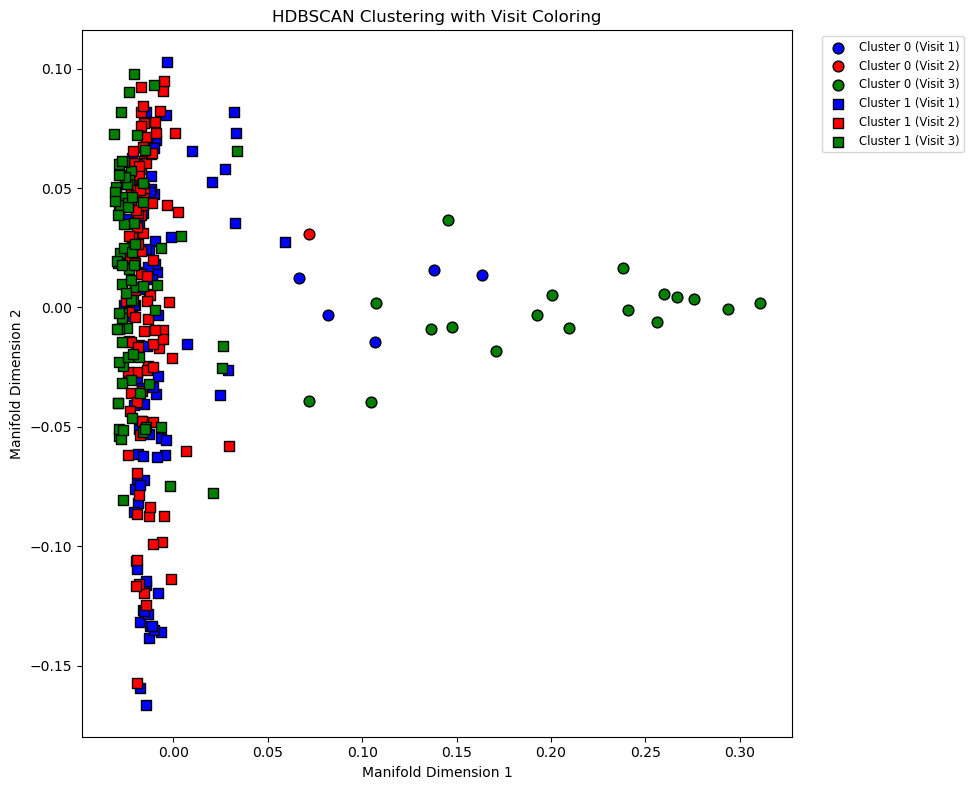

Visit Counts per Cluster:
   Cluster  Visit1  Visit2  Visit3
0        0       5       1      18
1        1      97     101      84


In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert gender to a NumPy array for element-wise comparison
visit = np.array(COPDGene_clinical_dataset['visitnum'].tolist())

# Initialize a dictionary to store cluster and visit counts
cluster_visit_counts = {}

# Step 4: Visualize clusters with sex and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {1: 'blue', 2: 'red', 3: 'green'}  # Define colors for visit

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_visit_counts[k] = {'Visit1': 0, 'Visit2': 0, 'Visit3': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for visit_i, visit_name in zip([1, 2, 3], ['Visit1', 'Visit2', 'Visit3']):
        visit_mask = (visit == visit_i)  # Perform element-wise comparison
        final_mask = class_member_mask & visit_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count males and females in the cluster
        cluster_visit_counts[k][visit_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[visit_i],
                        edgecolor='k', s=60, label=f"{cluster_name} (Visit {visit_i})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[visit_i],
                        s=60, label=f"{cluster_name} (Gender {visit_i})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Visit Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_visit_counts dictionary
cluster_visit_df = pd.DataFrame(cluster_visit_counts).T.reset_index()
cluster_visit_df.columns = ['Cluster', 'Visit1', 'Visit2', 'Visit3']

# Display the table
print("Visit Counts per Cluster:")
print(cluster_visit_df)

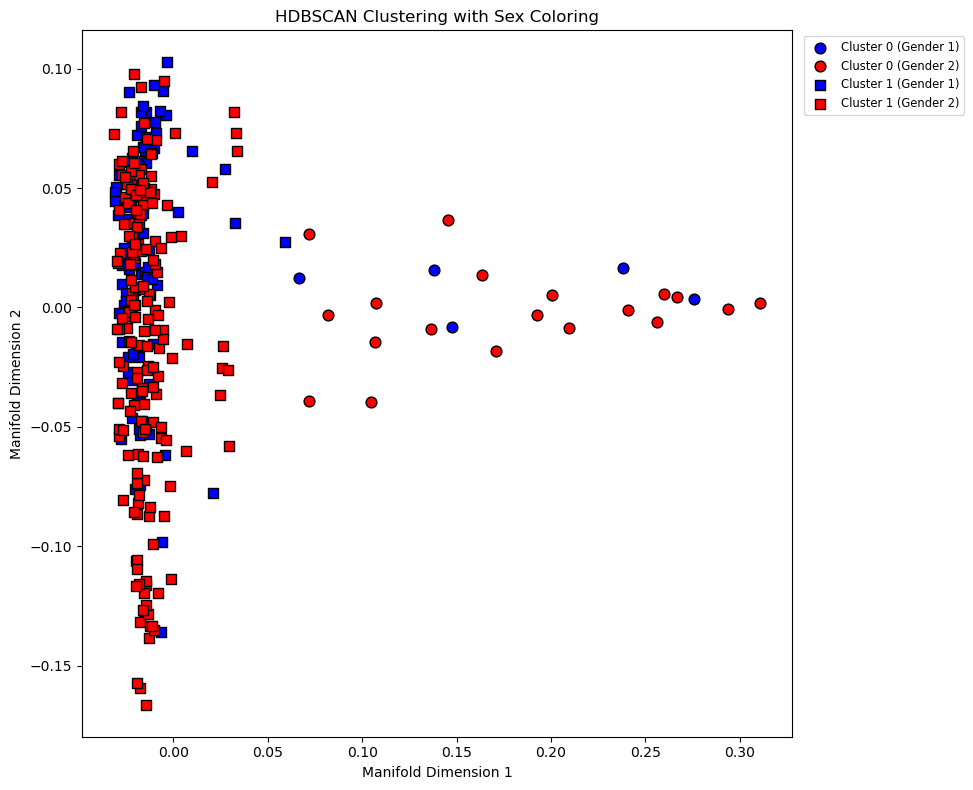

Gender Counts per Cluster:
   Cluster  Male  Female
0        0     5      19
1        1   103     179


In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert gender to a NumPy array for element-wise comparison
gender = np.array(COPDGene_clinical_dataset['gender'].tolist())

# Initialize a dictionary to store cluster and gender counts
cluster_gender_counts = {}

# Step 4: Visualize clusters with sex and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {1: 'blue', 2: 'red'}  # Define colors for gender

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_gender_counts[k] = {'Male': 0, 'Female': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for gender_i, gender_name in zip([1, 2], ['Male', 'Female']):
        gender_mask = (gender == gender_i)  # Perform element-wise comparison
        final_mask = class_member_mask & gender_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count males and females in the cluster
        cluster_gender_counts[k][gender_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[gender_i],
                        edgecolor='k', s=60, label=f"{cluster_name} (Gender {gender_i})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[gender_i],
                        s=60, label=f"{cluster_name} (Gender {gender_i})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Sex Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_gender_counts dictionary
cluster_gender_df = pd.DataFrame(cluster_gender_counts).T.reset_index()
cluster_gender_df.columns = ['Cluster', 'Male', 'Female']

# Display the table
print("Gender Counts per Cluster:")
print(cluster_gender_df)

In [ ]:
# Correcting for Batch Effects by Regressing Out the Batch Effect from Each Protein
import statsmodels.api as sm

# Correct each protein for batch effects
for protein in protein_columns:
    # Create dummy variables for the batch
    batch_dummies = pd.get_dummies(df['Batch'], drop_first=True)

    # Regression model: Protein ~ Batch
    X = sm.add_constant(batch_dummies)  # Add intercept
    y = df[protein]
    model = sm.OLS(y, X).fit()

    # Adjusted protein values (residuals)
    df[protein] = model.resid
